In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import io
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **Primero cargaremos los datos que vamos a analizar**

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle competitions download -c udea-ai4eng-20241

In [ ]:
! unzip "udea-ai4eng-20241.zip"

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv")
df

ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                      BOGOTÁ  Entre 5.5 millones y menos de 7 millones   
1                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
2                      BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
3                   SANTANDER  Entre 4 millones y menos de 5.5 millones   
4                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
692495             LA GUAJIRA         Entre 500 mil y menos de 1 millón   
692496        NORTE SANTANDER  Entre 2.5 millones y menos de 4 millones   
692497                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
692498                 TOLIMA  Entre 2.5 millones y menos de 4 millones   
692499              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1                            0            Estrato 3                 No   
2              Más de 30 horas            Estrato 3                 Si   
3                            0            Estrato 4                 Si   
4          Entre 21 y 30 horas            Estrato 3                 Si   
...                        ...                  ...                ...   
692495     Entre 11 y 20 horas            Estrato 2                 Si   
692496         Más de 30 horas            Estrato 3                 Si   
692497       Menos de 10 horas            Estrato 3                 Si   
692498       Menos de 10 horas            Estrato 1                 No   
692499         Más de 30 horas            Estrato 4                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0         Técnica o tecnológica incompleta                 Si   
1           Técnica o tecnológica completa                 Si   
2       Secundaria (Bachillerato) completa                 Si   
3                                  No sabe                 Si   
4                        Primaria completa                 Si   
...                                    ...                ...   
692495  Secundaria (Bachillerato) completa                 Si   
692496                 Primaria incompleta                 Si   
692497  Secundaria (Bachillerato) completa                 Si   
692498                   Primaria completa                 No   
692499  Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       Si                     N                       No   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       Si                     N                       No   
...                    ...                   ...                      ...   
692495                  No                     N                       Si   
692496                  No                     N        

In [ ]:
test = pd.read_csv("test.csv")
test

ID  PERIODO                     ESTU_PRGM_ACADEMICO  \
0       550236    20183                          TRABAJO SOCIAL   
1        98545    20203  ADMINISTRACION COMERCIAL Y DE MERCADEO   
2       499179    20212                  INGENIERIA MECATRONICA   
3       782980    20195                      CONTADURIA PUBLICA   
4       785185    20212              ADMINISTRACION DE EMPRESAS   
...        ...      ...                                     ...   
296781  496981    20195              ADMINISTRACION DE EMPRESAS   
296782  209415    20183                                 DERECHO   
296783  239074    20212                                 DERECHO   
296784  963852    20195                  INGENIERIA AERONAUTICA   
296785  792650    20212                   INGENIERIA INDUSTRIAL   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                     BOLIVAR                          Menos de 500 mil   
1                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones   
2                      BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
3                       SUCRE    Entre 1 millón y menos de 2.5 millones   
4                   ATLANTICO  Entre 2.5 millones y menos de 4 millones   
...                       ...                                       ...   
296781                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
296782                   META    Entre 1 millón y menos de 2.5 millones   
296783                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
296784              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones   
296785                 BOYACA                         No pagó matrícula   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0            Menos de 10 horas            Estrato 3                 Si   
1          Entre 21 y 30 horas            Estrato 2                 Si   
2                            0            Estrato 3                 Si   
3          Entre 21 y 30 horas            Estrato 1                 No   
4          Entre 11 y 20 horas            Estrato 2                 Si   
...                        ...                  ...                ...   
296781         Más de 30 horas            Estrato 1                 Si   
296782                       0            Estrato 4                 Si   
296783         Más de 30 horas            Estrato 3                 Si   
296784     Entre 11 y 20 horas            Estrato 3                 Si   
296785                       0            Estrato 3                 Si   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0             Técnica o tecnológica completa                 Si   
1         Secundaria (Bachillerato) completa                 Si   
2       Secundaria (Bachillerato) incompleta                 Si   
3                        Primaria incompleta                 Si   
4         Secundaria (Bachillerato) completa                 Si   
...                                      ...                ...   
296781                   Primaria incompleta                 Si   
296782        Educación profesional completa                 Si   
296783    Secundaria (Bachillerato) completa                 Si   
296784        Educación profesional completa                 Si   
296785    Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       No                     N                       Si   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       No                     N                       No   
...                    ...                   ...                      ...   
296781                  Si                     N                       Si

# **Organizaremos los datos de acuerdo al ID de menor a mayor**

In [ ]:
df.sort_values(by=['ID'])

ID  PERIODO                            ESTU_PRGM_ACADEMICO  \
348654       1    20183                            HOTELERIA Y TURISMO   
305495       3    20183                             CONTADURÍA PÚBLICA   
673360       4    20183          INGENIERIA AMBIENTAL Y DE SANEAMIENTO   
569302       5    20183  CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION   
394380       6    20183                                     PSICOLOGIA   
...        ...      ...                                            ...   
112403  989281    20212            ADMINISTRACIÓN EN SALUD OCUPACIONAL   
664599  989282    20212                             INGENIERIA QUIMICA   
334687  989283    20212             LICENCIATURA EN EDUCACIÓN INFANTIL   
619348  989284    20212                               INGENIERIA CIVIL   
596787  989286    20212           MARKETING Y NEGOCIOS INTERNACIONALES   

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
348654                 BOGOTÁ  Entre 2.5 millones y menos de 4 millones   
305495                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
673360              SANTANDER         Entre 500 mil y menos de 1 millón   
569302                QUINDIO         Entre 500 mil y menos de 1 millón   
394380                  SUCRE    Entre 1 millón y menos de 2.5 millones   
...                       ...                                       ...   
112403                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
664599                 BOGOTÁ                         Más de 7 millones   
334687                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones   
619348             LA GUAJIRA                          Menos de 500 mil   
596787              MAGDALENA    Entre 1 millón y menos de 2.5 millones   

       ESTU_HORASSEMANATRABAJA FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
348654     Entre 11 y 20 horas            Estrato 2                 Si   
305495         Más de 30 horas            Estrato 2                 Si   
673360                       0            Estrato 2                 Si   
569302     Entre 21 y 30 horas            Estrato 3                 Si   
394380                       0            Estrato 1                 No   
...                        ...                  ...                ...   
112403         Más de 30 horas            Estrato 2                 Si   
664599                       0            Estrato 5                 Si   
334687       Menos de 10 horas            Estrato 3                 Si   
619348     Entre 21 y 30 horas            Estrato 1                 Si   
596787     Entre 21 y 30 horas            Estrato 3                 Si   

                         FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
348654                     Primaria completa                 Si   
305495                             No Aplica                 Si   
673360                             Postgrado                 Si   
569302        Educación profesional completa                 Si   
394380      Educación profesional incompleta                 Si   
...                                      ...                ...   
112403  Secundaria (Bachillerato) incompleta                 Si   
664599                             Postgrado                 Si   
334687                     Primaria completa                 Si   
619348  Secundaria (Bachillerato) incompleta                 Si   
596787    Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
348654                  Si                     N                       No   
305495                  No                     N                       Si   
673360                  No                     N                       No   
569302                  No                     N                       Si   
394380                  No                     N                       No   
...                    ...                   ...                  

### **Ahora comprobaremos si alguna columna tiene mas de 10% de sus datos en valor nulo**

Como podemos comprobar, ninguno supera el 10% de datos nulos, por lo tanto no tendremos que soltar una columna por ese caso.

In [ ]:
k = df.isna().sum()
k[k!=0]

ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
dtype: int64

### **Comparar los valores de las dos columnas del internet**

Obtenemos los valores distinto entre FAMI_TIENEINTERNET y FAMI_TIENEINTERNET.1 para comprobar que no haya datos distintos

In [ ]:
Inter1 = df['FAMI_TIENEINTERNET']
Inter2 = df['FAMI_TIENEINTERNET.1']
comp = pd.concat([Inter1,Inter2],axis=1)
comp = comp[comp['FAMI_TIENEINTERNET'] != comp['FAMI_TIENEINTERNET.1']].dropna()
print(comp)

Empty DataFrame
Columns: [FAMI_TIENEINTERNET, FAMI_TIENEINTERNET.1]
Index: []


Ya que no ahi valores distintos, podremos soltar la columna FAMI_TIENEINTERNET.1 por datos duplicados.

In [ ]:
df = df.drop('FAMI_TIENEINTERNET.1', axis=1)
test = test.drop('FAMI_TIENEINTERNET.1', axis=1)

**Crearemos una copia del dataframe para no modificar el original y a su vez convertiremos los valores nulos a strings de nombre "nan" para mayor facilidad de dibujado en graficos**

In [ ]:
graph_df = df.copy()
graph_df = graph_df.fillna('nan')
test = test.fillna('nan')

In [ ]:
testID = test[['ID']].copy()

### **Comparación, Organización y listado de valores en ESTU_PRGM_ACADEMICO**

Usaremos la siguiente grafica para ver cuales valores son los mismos pero tienen diferencias en su nombramiento, ya sea por errores de formato o por diferente escritura

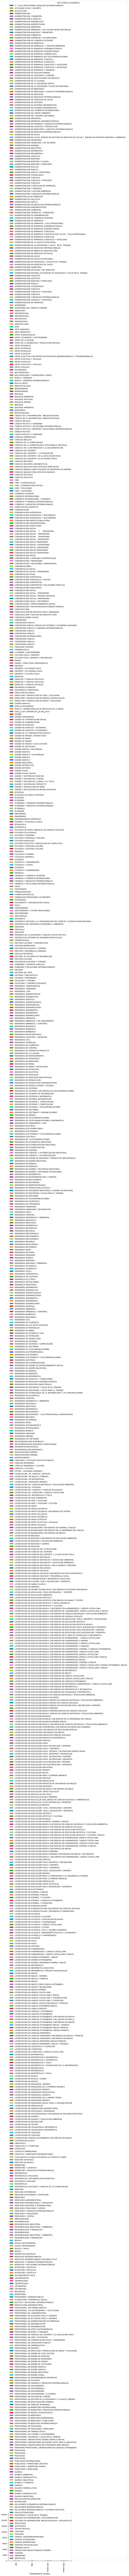

In [ ]:
#Grafico de barras apiladas y agrupadas
graph_df.groupby(['RENDIMIENTO_GLOBAL', 'ESTU_PRGM_ACADEMICO']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

'''
#Heatmaps categoricos
pivot_table = graph_df.pivot_table(index='PERIODO', columns='RENDIMIENTO_GLOBAL', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.show()
'''

contingency_table = pd.crosstab(graph_df['RENDIMIENTO_GLOBAL'], graph_df['ESTU_PRGM_ACADEMICO'])

## **Renombramiento**

Usando la lista de programas academicos anterior buscaremos todos las materias que sean iguales o parecidas en nombre al top 25 de los programas, ya que el top 25 probablemente tendra algun que otro valor repetido con otro nombre tomaremos el top 40 hasta tener 25 programas unicos

In [ ]:
graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False).head(40)

ESTU_PRGM_ACADEMICO
DERECHO                                       53244
ADMINISTRACION DE EMPRESAS                    51902
CONTADURIA PUBLICA                            39664
PSICOLOGIA                                    31932
INGENIERIA INDUSTRIAL                         28481
ADMINISTRACIÓN DE EMPRESAS                    24777
INGENIERIA CIVIL                              19487
MEDICINA                                      18099
PSICOLOGÍA                                    17377
INGENIERIA DE SISTEMAS                        17150
TRABAJO SOCIAL                                12686
ENFERMERIA                                    11635
ARQUITECTURA                                  11469
ADMINISTRACIÓN EN SALUD OCUPACIONAL           11018
CONTADURÍA PÚBLICA                            10912
INGENIERIA AMBIENTAL                           9999
NEGOCIOS INTERNACIONALES                       8858
LICENCIATURA EN PEDAGOGIA INFANTIL             8468
ECONOMIA                                       7023
INGENIERIA MECANICA                            6928
INGENIERIA ELECTRONICA                         6407
INGENIERÍA INDUSTRIAL                          6313
LICENCIATURA EN PEDAGOGÍA INFANTIL             6305
FISIOTERAPIA                                   5992
COMUNICACION SOCIAL                            5320
ODONTOLOGIA                                    5120
ADMINISTRACION PUBLICA TERRITORIAL             5002
ADMINISTRACION DE NEGOCIOS INTERNACIONALES     4429
INGENIERIA QUIMICA                             3961
COMUNICACION SOCIAL- PERIODISMO                3512
ADMINISTRACIÓN FINANCIERA                      3366
INGENIERÍA AMBIENTAL                           2991
ADMINISTRACION FINANCIERA                      2972
MEDICINA VETERINARIA Y ZOOTECNIA               2865
DISEÑO GRAFICO                                 2818
BIOLOGIA                                       2770
INGENIERIA ELECTRICA                           2703
DISEÑO INDUSTRIAL                              2697
MEDICINA VETERINARIA                           2544
MERCADEO                                       2445
Name: count, dtype: int64

# **Combinacion**

Ahora combinaremos todos los valores que consideremos iguales bajo un mismo nombre, esto nos ayudara a disminuir la cantidad de valores distintos unicos y nos permitira reducir el error al combinar todos los demas valores fuera del top 25 en una nueva categoria que nombrariamos otros.

In [ ]:
def rename(df, located, name):
    print("Valores en diferentes nombres: \n")
    print(df.loc[located, 'ESTU_PRGM_ACADEMICO'].value_counts(dropna=False), "\n \nOrganizando todos bajo un solo nombre: \n")
    df.loc[located, 'ESTU_PRGM_ACADEMICO'] = name
    print(df.loc[located, 'ESTU_PRGM_ACADEMICO'].value_counts(dropna=False))
    print()

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('DERECHO') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('DERECHOS')
rename(graph_df, located, 'DERECHO')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('DERECHO') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('DERECHOS')
rename(test, mix_test, 'DERECHO')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
DERECHO                         53244
DERECHO Y CIENCIAS POLITICAS      248
DERECHO Y CIENCIAS SOCIALES       151
DERECHO Y CIENCIAS POLÍTICAS       53
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
DERECHO    53696
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
DERECHO                         22984
DERECHO Y CIENCIAS POLITICAS      115
DERECHO Y CIENCIAS SOCIALES        52
DERECHO Y CIENCIAS POLÍTICAS       19
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
DERECHO    23170
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('EMPRESAS') | (graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ADMINISTRACI') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('NEGOCIO') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONALES'))
rename(graph_df, located, 'ADMINISTRACION DE EMPRESAS')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('EMPRESAS') | (test['ESTU_PRGM_ACADEMICO'].str.contains('ADMINISTRACI') & test['ESTU_PRGM_ACADEMICO'].str.contains('NEGOCIO') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONALES'))
rename(test, mix_test, 'ADMINISTRACION DE EMPRESAS')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION DE EMPRESAS                                              51902
ADMINISTRACIÓN DE EMPRESAS                                              24777
ADMINISTRACION DE NEGOCIOS                                               2049
ADMINISTRACION Y DIRECCION DE EMPRESAS                                   1111
PROFESIONAL EN ADMINISTRACIÓN DE EMPRESAS                                 853
ADMINISTRACION DE EMPRESAS AGROPECUARIAS                                  645
ADMINISTRACION DE EMPRESAS COMERCIALES                                    498
ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS                         432
ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS                         283
ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS                                     235
ADMINISTRACION DE EMPRESAS TURISTICAS                                     229
ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS                         164
ADMINISTRAC

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('CONTADUR') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONAL')
rename(graph_df, located, 'CONTADURIA PUBLICA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('CONTADUR') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONAL')
rename(test, mix_test, 'CONTADURIA PUBLICA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
CONTADURIA PUBLICA                                             39664
CONTADURÍA PÚBLICA                                             10912
CONTADURIA PÚBLICA                                              1144
PROFESIONAL EN CONTADURIA PUBLICA                                768
CONTADURÍA PUBLICA                                               126
CONTADURIA PUBLICA ENFASIS EN SISTEMAS Y ECONOMIA SOLIDARIA      110
CONTADURIA P¿BLICA                                                86
CONTADURÍA PÚBLICA.                                               78
CONTADURIA                                                        39
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
CONTADURIA PUBLICA    52927
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
CONTADURIA PUBLICA                                             16861
CONTADURÍA PÚBLICA                                         

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('PSICOLOG')
rename(graph_df, located, 'PSICOLOGIA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('PSICOLOG')
rename(test, mix_test, 'PSICOLOGIA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
PSICOLOGIA                                31932
PSICOLOGÍA                                17377
PROFESIONAL EN PSICOLOGÍA                   716
LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA      205
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
PSICOLOGIA    50230
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
PSICOLOGIA                                13818
PSICOLOGÍA                                 7438
PROFESIONAL EN PSICOLOGÍA                   295
LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA       73
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
PSICOLOGIA    21624
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INGENIE') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains(' INDUSTRIAL')
rename(graph_df, located, 'INGENIERIA INDUSTRIAL')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('INGENIE') & test['ESTU_PRGM_ACADEMICO'].str.contains(' INDUSTRIAL')
rename(test, mix_test, 'INGENIERIA INDUSTRIAL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA INDUSTRIAL                                        28481
INGENIERÍA INDUSTRIAL                                         6313
INGENIERIA EN SEGURIDAD INDUSTRIAL E HIGIENE OCUPACIONAL       540
INGENIERIA EN HIGIENE Y SEGURIDAD INDUSTRIAL                   141
INGENIERÍA EN DISEÑO INDUSTRIAL                                131
INGENIERIA DE PROCESOS INDUSTRIALES                            130
INGENIERIA EN AUTOMATICA INDUSTRIAL                             83
INGENIERÍA EN PROCESOS INDUSTRIALES                             54
INGENIER¿A INDUSTRIAL                                           24
INGENIERIA EN CONTROL Y AUTOMATIZACION INDUSTRIAL               17
INGENIERIA EN DISEÑO INDUSTRIAL                                  3
INGENIERIA EN AUTOMATIZACION INDUSTRIAL                          3
INGENIERIA EN DISEÑO DE MAQUINAS Y PRODUCTOS INDUSTRIALES        2
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_P

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('CIVIL')
rename(graph_df, located, 'INGENIERIA CIVIL')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('CIVIL')
rename(test, mix_test, 'INGENIERIA CIVIL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA CIVIL          19487
INGENIERÍA CIVIL           1456
INGENIERIA  CIVIL           372
CONSTRUCCIONES CIVILES      254
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA CIVIL    21569
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA CIVIL          8425
INGENIERÍA CIVIL           654
INGENIERIA  CIVIL          158
CONSTRUCCIONES CIVILES     103
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA CIVIL    9340
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('MEDICINA') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('VETERINARIA')
rename(graph_df, located, 'MEDICINA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('MEDICINA') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('VETERINARIA')
rename(test, mix_test, 'MEDICINA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
MEDICINA    18099
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
MEDICINA    18099
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
MEDICINA    7915
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
MEDICINA    7915
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INGENIE') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('SISTEMAS')
rename(graph_df, located, 'INGENIERIA DE SISTEMAS')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('INGENIE') & test['ESTU_PRGM_ACADEMICO'].str.contains('SISTEMAS')
rename(test, mix_test, 'INGENIERIA DE SISTEMAS')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA DE SISTEMAS                                      17150
INGENIERIA DE SISTEMAS Y COMPUTACION                         1307
INGENIERÍA DE SISTEMAS                                        878
INGENIERIA DE SISTEMAS Y TELECOMUNICACIONES                   282
INGENIERIA DE SISTEMAS E INFORMATICA                          235
INGENIERÍA DE SISTEMAS Y COMPUTACIÓN                          182
INGENIERIA DE SISTEMAS Y  COMPUTACION                         102
INGENIERIA DE SISTEMAS DE INFORMACION                          48
INGENIER¿A DE SISTEMAS                                         22
INGENIERIA DE SISTEMAS INFORMÁTICOS                            17
INGENIERIA DE SISTEMAS CON ENFASIS EN TELECOMUNICACIONES        4
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA DE SISTEMAS    20227
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA DE SISTE

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('TRABAJO SOCIAL')
rename(graph_df, located, 'TRABAJO SOCIAL')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('TRABAJO SOCIAL')
rename(test, mix_test, 'TRABAJO SOCIAL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
TRABAJO SOCIAL                   12686
PROFESIONAL EN TRABAJO SOCIAL      415
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
TRABAJO SOCIAL    13101
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
TRABAJO SOCIAL                   5286
PROFESIONAL EN TRABAJO SOCIAL     171
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
TRABAJO SOCIAL    5457
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ENFERMER')
rename(graph_df, located, 'ENFERMERIA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ENFERMER')
rename(test, mix_test, 'ENFERMERIA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ENFERMERIA    11635
ENFERMERÍA      551
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ENFERMERIA    12186
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ENFERMERIA    4998
ENFERMERÍA     225
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ENFERMERIA    5223
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ARQUITECTURA')
rename(graph_df, located, 'ARQUITECTURA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ARQUITECTURA')
rename(test, mix_test, 'ARQUITECTURA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ARQUITECTURA                                 11469
CONSTRUCCION Y GESTION EN ARQUITECTURA         257
CONSTRUCCION EN ARQUITECTURA E INGENIERIA      170
ADMINISTRACIÓN DE OBRAS DE ARQUITECTURA         13
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ARQUITECTURA    11909
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ARQUITECTURA                                 4851
CONSTRUCCION Y GESTION EN ARQUITECTURA        103
CONSTRUCCION EN ARQUITECTURA E INGENIERIA      84
ADMINISTRACIÓN DE OBRAS DE ARQUITECTURA         4
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ARQUITECTURA    5042
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('SALUD ') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('GERENCIA')
rename(graph_df, located, 'SALUD OCUPACIONAL')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('SALUD ') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('GERENCIA')
rename(test, mix_test, 'SALUD OCUPACIONAL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ADMINISTRACIÓN EN SALUD OCUPACIONAL                                                                              11018
SALUD OCUPACIONAL                                                                                                 2058
PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL                                                         2015
SEGURIDAD Y SALUD EN EL TRABAJO                                                                                   1467
ADMINISTRACIÓN INTEGRAL DE RIESGOS DE SEGURIDAD Y SALUD EN EL TRABAJO                                              772
INGENIERIA EN SEGURIDAD Y SALUD PARA EL TRABAJO                                                                    704
ADMINISTRACIÓN EN SEGURIDAD Y SALUD EN EL TRABAJO                                                                  689
ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL                                                                

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('AMBIENTAL') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INGENIE')
rename(graph_df, located, 'INGENIERIA AMBIENTAL')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('AMBIENTAL') & test['ESTU_PRGM_ACADEMICO'].str.contains('INGENIE')
rename(test, mix_test, 'INGENIERIA AMBIENTAL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA AMBIENTAL                     9999
INGENIERÍA AMBIENTAL                     2991
INGENIERIA AMBIENTAL Y SANITARIA         1450
INGENIERIA AMBIENTAL Y DE SANEAMIENTO     264
INGENIERIA SANITARIA Y AMBIENTAL          200
INGENIERIA  AMBIENTAL                     140
INGENIERIA GEOGRAFICA Y AMBIENTAL         133
INGENIERÍA GEOGRÁFICA Y AMBIENTAL         104
INGENIERÍA AMBIENTAL Y SANITARIA           62
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA AMBIENTAL    15343
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA AMBIENTAL                     4429
INGENIERÍA AMBIENTAL                     1290
INGENIERIA AMBIENTAL Y SANITARIA          666
INGENIERIA AMBIENTAL Y DE SANEAMIENTO     125
INGENIERIA SANITARIA Y AMBIENTAL           89
INGENIERIA  AMBIENTAL                      51
INGENIERIA GEOGRAFICA Y AMBIENTAL          43
INGENIERÍA 

In [ ]:
located = (graph_df['ESTU_PRGM_ACADEMICO'].str.contains('NEGOCIOS') | graph_df['ESTU_PRGM_ACADEMICO'].str.contains('FINANZAS')) & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONALES') | (graph_df['ESTU_PRGM_ACADEMICO'].str.contains('CONTADUR') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INTERNA'))
rename(graph_df, located, 'NEGOCIOS INTERNACIONALES')
mix_test = (test['ESTU_PRGM_ACADEMICO'].str.contains('NEGOCIOS') | test['ESTU_PRGM_ACADEMICO'].str.contains('FINANZAS')) & test['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONALES') | (test['ESTU_PRGM_ACADEMICO'].str.contains('CONTADUR') & test['ESTU_PRGM_ACADEMICO'].str.contains('INTERNA'))
rename(test, mix_test, 'NEGOCIOS INTERNACIONALES')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
NEGOCIOS INTERNACIONALES                                 8858
ADMINISTRACION DE NEGOCIOS INTERNACIONALES               4429
FINANZAS Y NEGOCIOS INTERNACIONALES                      1179
ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES     704
MARKETING Y NEGOCIOS INTERNACIONALES                      595
MERCADEO Y NEGOCIOS INTERNACIONALES                       519
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES                506
NEGOCIOS Y RELACIONES INTERNACIONALES                     391
NEGOCIOS Y FINANZAS INTERNACIONALES                       337
ECONOMIA Y NEGOCIOS INTERNACIONALES                       304
FINANZAS Y RELACIONES INTERNACIONALES                     304
NEGOCIOS INTERNACIONALES SEGUNDO CICLO                    287
PROFESIONAL EN MARKETING Y NEGOCIOS INTERNACIONALES       238
PROFESIONAL EN NEGOCIOS INTERNACIONALES                   221
PROFESIONAL EN FINANZAS Y NEGOCIOS INTERNACIONALES        201
COMERCIO Y NEGOCI

In [ ]:
located = (graph_df['ESTU_PRGM_ACADEMICO'].str.contains('PEDAGOG') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('REHABILITACI') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('TIERRA') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ENFASIS') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('REEDUCATIVA')) | graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INFANTIL') | graph_df['ESTU_PRGM_ACADEMICO'].str.contains('PREESCOLAR')
rename(graph_df, located, 'PEDAGOGIA INFANTIL')
mix_test = (test['ESTU_PRGM_ACADEMICO'].str.contains('PEDAGOG') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('REHABILITACI') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('TIERRA') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('ENFASIS') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('REEDUCATIVA')) | test['ESTU_PRGM_ACADEMICO'].str.contains('INFANTIL') | test['ESTU_PRGM_ACADEMICO'].str.contains('PREESCOLAR')
rename(test, mix_test, 'PEDAGOGIA INFANTIL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
LICENCIATURA EN PEDAGOGIA INFANTIL                            8468
LICENCIATURA EN PEDAGOGÍA INFANTIL                            6305
LICENCIATURA EN EDUCACION PREESCOLAR                          2066
LICENCIATURA EN EDUCACION INFANTIL                            1849
LICENCIATURA EN EDUCACIÓN INFANTIL                             685
LICENCIATURA  PEDAGOGIA INFANTIL                               659
LICENCIATURA EN PREESCOLAR                                     441
LICENCIATURA EN PEDAGOGIA DE LA PRIMERA INFANCIA               158
LICENCIATURA EN PEDAGOGIA  INFANTIL                             77
LICENCIATURA EN PEDAGOG¿A INFANTIL                              71
LICENCIATURA EN EDUCACI¿N INFANTIL                              50
LICENCIATURA EN EDUCACIÓN PREESCOLAR                            43
PEDAGOGÍA                                                       19
LICENCIATURA EN EDUCACION PREESCOLAR CON ENFASIS EN INGLES      16
Name: cou

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ECONOM') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONAL') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('FILOSOFIA')
rename(graph_df, located, 'ECONOMIA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ECONOM') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('INTERNACIONAL') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('FILOSOFIA')
rename(test, mix_test, 'ECONOMIA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ECONOMIA    7023
ECONOMÍA     492
ECONOM¿A      30
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ECONOMIA    7545
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ECONOMIA    2966
ECONOMÍA     192
ECONOM¿A      13
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ECONOMIA    3171
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('MEC') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('NICA') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ELECTRO') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('MECATR')
rename(graph_df, located, 'INGENIERIA MECANICA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('MEC') & test['ESTU_PRGM_ACADEMICO'].str.contains('NICA') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('ELECTRO') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('MECATR')
rename(test, mix_test, 'INGENIERIA MECANICA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA MECANICA    6928
INGENIERÍA MECÁNICA     337
INGENIERIA MECÁNICA       6
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA MECANICA    7271
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA MECANICA    2900
INGENIERÍA MECÁNICA     135
INGENIERIA MECÁNICA       2
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA MECANICA    3037
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ELECTR') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('NICA') & ~graph_df['ESTU_PRGM_ACADEMICO'].str.contains('MEC')
rename(graph_df, located, 'INGENIERIA ELECTRONICA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ELECTR') & test['ESTU_PRGM_ACADEMICO'].str.contains('NICA') & ~test['ESTU_PRGM_ACADEMICO'].str.contains('MEC')
rename(test, mix_test, 'INGENIERIA ELECTRONICA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA ELECTRONICA                         6407
INGENIERIA ELECTRONICA Y TELECOMUNICACIONES     399
INGENIERÍA ELECTRÓNICA                          397
INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES      67
LICENCIATURA EN ELECTRONICA                      42
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA ELECTRONICA    7312
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA ELECTRONICA                         2789
INGENIERÍA ELECTRÓNICA                          180
INGENIERIA ELECTRONICA Y TELECOMUNICACIONES     155
INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES      27
LICENCIATURA EN ELECTRONICA                      14
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA ELECTRONICA    3165
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('FISIOTERAPIA')
rename(graph_df, located, 'FISIOTERAPIA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('FISIOTERAPIA')
rename(test, mix_test, 'FISIOTERAPIA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
FISIOTERAPIA    5992
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
FISIOTERAPIA    5992
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
FISIOTERAPIA    2628
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
FISIOTERAPIA    2628
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('COMUNICACI') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('SOCIAL')
rename(graph_df, located, 'COMUNICACION SOCIAL')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('COMUNICACI') & test['ESTU_PRGM_ACADEMICO'].str.contains('SOCIAL')
rename(test, mix_test, 'COMUNICACION SOCIAL')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
COMUNICACION SOCIAL                                5320
COMUNICACION SOCIAL- PERIODISMO                    3512
COMUNICACION SOCIAL Y PERIODISMO                   1560
COMUNICACIÓN SOCIAL                                1031
COMUNICACION SOCIAL - PERIODISMO                    875
COMUNICACION SOCIALY PERIODISMO                     738
COMUNICACION SOCIAL-PERIODISMO                      668
COMUNICACION SOCIAL -  PERIODISMO                   474
COMUNICACION SOCIAL  - PERIODISMO                   218
COMUNICACION SOCIAL PERIODISMO                      102
COMUNICACIÓN SOCIAL Y MEDIOS DIGITALES               57
COMUNICACIÓN SOCIAL - PERIODISMO                     53
COMUNICACI¿N SOCIAL                                  43
COMUNICACION SOCIAL     Y     PERIODISMO             34
PROFESIONAL EN COMUNICACION SOCIAL - PERIODISMO      24
COMUNICACI¿N SOCIAL Y PERIODISMO                     17
COMUNICACIÓN SOCIAL Y PERIODISMO                   

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ODONTOLOG')
rename(graph_df, located, 'ODONTOLOGIA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ODONTOLOG')
rename(test, mix_test, 'ODONTOLOGIA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ODONTOLOGIA    5120
ODONTOLOGÍA     152
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ODONTOLOGIA    5272
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ODONTOLOGIA    2132
ODONTOLOGÍA      70
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ODONTOLOGIA    2202
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ADMINISTRACI') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('BLICA')
rename(graph_df, located, 'ADMINISTRACION PUBLICA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ADMINISTRACI') & test['ESTU_PRGM_ACADEMICO'].str.contains('BLICA')
rename(test, mix_test, 'ADMINISTRACION PUBLICA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION PUBLICA TERRITORIAL    5002
ADMINISTRACION PUBLICA                1664
ADMINISTRACIÓN PÚBLICA                 121
ADMINISTRACI¿N P¿BLICA                  47
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION PUBLICA    6834
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION PUBLICA TERRITORIAL    2111
ADMINISTRACION PUBLICA                 709
ADMINISTRACIÓN PÚBLICA                  45
ADMINISTRACI¿N P¿BLICA                  24
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION PUBLICA    2889
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('QUIMICA')
rename(graph_df, located, 'INGENIERIA QUIMICA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('QUIMICA')
rename(test, mix_test, 'INGENIERIA QUIMICA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA QUIMICA                               3961
QUIMICA                                          1349
QUIMICA FARMACEUTICA                              918
LICENCIATURA EN BIOLOGIA Y QUIMICA                510
LICENCIATURA EN QUIMICA                           279
QUIMICA INDUSTRIAL                                157
BIOQUIMICA                                         33
QUIMICA.                                           29
QUIMICA AMBIENTAL                                  29
LICENCIATURA EN QUIMICA Y EDUCACION AMBIENTAL      12
QUIMICA Y FARMACIA                                  1
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
INGENIERIA QUIMICA    7278
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
INGENIERIA QUIMICA                               1700
QUIMICA                                           592
QUIMICA FARMACEUTICA                            

In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ADMINISTRACI') & graph_df['ESTU_PRGM_ACADEMICO'].str.contains('FINANCIERA')
rename(graph_df, located, 'ADMINISTRACION FINANCIERA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('ADMINISTRACI') & test['ESTU_PRGM_ACADEMICO'].str.contains('FINANCIERA')
rename(test, mix_test, 'ADMINISTRACION FINANCIERA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ADMINISTRACIÓN FINANCIERA                  3366
ADMINISTRACION FINANCIERA                  2972
ADMINISTRACIÓN COMERCIAL Y FINANCIERA       170
ADMINISTRACION BANCARIA Y FINANCIERA        135
ADMINISTRACION  FINANCIERA                   74
ADMINISTRACION FINANCIERA Y DE SISTEMAS      73
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION FINANCIERA    6790
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
ADMINISTRACIÓN FINANCIERA                  1482
ADMINISTRACION FINANCIERA                  1321
ADMINISTRACIÓN COMERCIAL Y FINANCIERA        74
ADMINISTRACION BANCARIA Y FINANCIERA         60
ADMINISTRACION  FINANCIERA                   37
ADMINISTRACION FINANCIERA Y DE SISTEMAS      35
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
ADMINISTRACION FINANCIERA    3009
Name: count, dtype: int64



In [ ]:
located = graph_df['ESTU_PRGM_ACADEMICO'].str.contains('VETERINARIA') | graph_df['ESTU_PRGM_ACADEMICO'].str.contains('ZOOTECNIA')
rename(graph_df, located, 'MEDICINA VETERINARIA')
mix_test = test['ESTU_PRGM_ACADEMICO'].str.contains('VETERINARIA') | test['ESTU_PRGM_ACADEMICO'].str.contains('ZOOTECNIA')
rename(test, mix_test, 'MEDICINA VETERINARIA')

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
MEDICINA VETERINARIA Y ZOOTECNIA    2865
MEDICINA VETERINARIA                2544
ZOOTECNIA                           1669
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
MEDICINA VETERINARIA    7078
Name: count, dtype: int64

Valores en diferentes nombres: 

ESTU_PRGM_ACADEMICO
MEDICINA VETERINARIA Y ZOOTECNIA    1200
MEDICINA VETERINARIA                1043
ZOOTECNIA                            709
Name: count, dtype: int64 
 
Organizando todos bajo un solo nombre: 

ESTU_PRGM_ACADEMICO
MEDICINA VETERINARIA    2952
Name: count, dtype: int64



**Ahora miraremos el nuevo orden que tendra el top25, obtenido despues de organizar todos bajo el mismo nombre**

In [ ]:
graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False).head(25)

ESTU_PRGM_ACADEMICO
ADMINISTRACION DE EMPRESAS    83792
DERECHO                       53696
CONTADURIA PUBLICA            52927
PSICOLOGIA                    50230
INGENIERIA INDUSTRIAL         35922
INGENIERIA CIVIL              21569
PEDAGOGIA INFANTIL            20907
INGENIERIA DE SISTEMAS        20227
NEGOCIOS INTERNACIONALES      19748
SALUD OCUPACIONAL             19683
MEDICINA                      18099
INGENIERIA AMBIENTAL          15343
COMUNICACION SOCIAL           14727
TRABAJO SOCIAL                13101
ENFERMERIA                    12186
ARQUITECTURA                  11909
ECONOMIA                       7545
INGENIERIA ELECTRONICA         7312
INGENIERIA QUIMICA             7278
INGENIERIA MECANICA            7271
MEDICINA VETERINARIA           7078
ADMINISTRACION PUBLICA         6834
ADMINISTRACION FINANCIERA      6790
FISIOTERAPIA                   5992
ODONTOLOGIA                    5272
Name: count, dtype: int64

In [ ]:
test['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False).head(25)

ESTU_PRGM_ACADEMICO
ADMINISTRACION DE EMPRESAS    36073
DERECHO                       23170
CONTADURIA PUBLICA            22600
PSICOLOGIA                    21624
INGENIERIA INDUSTRIAL         15706
INGENIERIA CIVIL               9340
PEDAGOGIA INFANTIL             8865
INGENIERIA DE SISTEMAS         8609
NEGOCIOS INTERNACIONALES       8562
SALUD OCUPACIONAL              8409
MEDICINA                       7915
INGENIERIA AMBIENTAL           6764
COMUNICACION SOCIAL            6185
TRABAJO SOCIAL                 5457
ENFERMERIA                     5223
ARQUITECTURA                   5042
INGENIERIA QUIMICA             3196
ECONOMIA                       3171
INGENIERIA ELECTRONICA         3165
INGENIERIA MECANICA            3037
ADMINISTRACION FINANCIERA      3009
MEDICINA VETERINARIA           2952
ADMINISTRACION PUBLICA         2889
FISIOTERAPIA                   2628
ODONTOLOGIA                    2202
Name: count, dtype: int64

# **Agregar el resto a otros**

Usando el top 25 como base podremos convertir los demas a una nueva categoria que llamaremos otros

In [ ]:
top25 = graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False).head(25).index
graph_df.loc[~graph_df['ESTU_PRGM_ACADEMICO'].isin(top25), 'ESTU_PRGM_ACADEMICO'] = 'OTROS'
top25 = test['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False).head(25).index
test.loc[~test['ESTU_PRGM_ACADEMICO'].isin(top25), 'ESTU_PRGM_ACADEMICO'] = 'OTROS'
graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False)

ESTU_PRGM_ACADEMICO
OTROS                         167062
ADMINISTRACION DE EMPRESAS     83792
DERECHO                        53696
CONTADURIA PUBLICA             52927
PSICOLOGIA                     50230
INGENIERIA INDUSTRIAL          35922
INGENIERIA CIVIL               21569
PEDAGOGIA INFANTIL             20907
INGENIERIA DE SISTEMAS         20227
NEGOCIOS INTERNACIONALES       19748
SALUD OCUPACIONAL              19683
MEDICINA                       18099
INGENIERIA AMBIENTAL           15343
COMUNICACION SOCIAL            14727
TRABAJO SOCIAL                 13101
ENFERMERIA                     12186
ARQUITECTURA                   11909
ECONOMIA                        7545
INGENIERIA ELECTRONICA          7312
INGENIERIA QUIMICA              7278
INGENIERIA MECANICA             7271
MEDICINA VETERINARIA            7078
ADMINISTRACION PUBLICA          6834
ADMINISTRACION FINANCIERA       6790
FISIOTERAPIA                    5992
ODONTOLOGIA                     5272
Name: count, dtype: int64

In [ ]:
graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False).sum()

np.int64(692500)

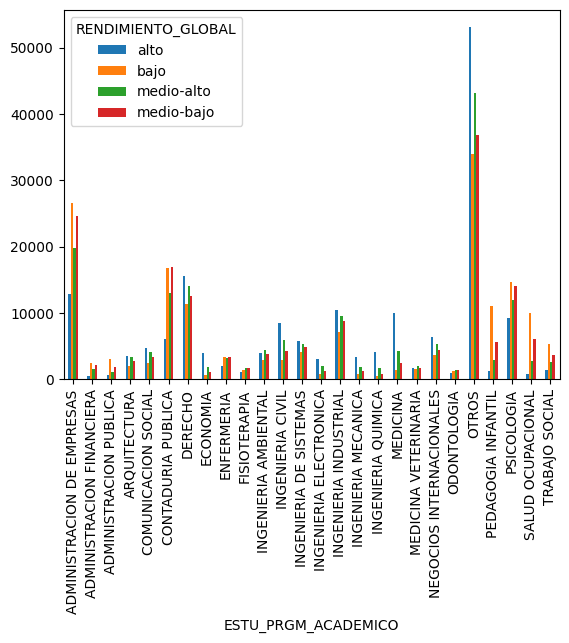

In [ ]:
#Grafico de barras apiladas y agrupadas
graph_df.groupby(['ESTU_PRGM_ACADEMICO', 'RENDIMIENTO_GLOBAL']).size().unstack().plot(kind='bar', stacked=False)
plt.show()

contingency_table = pd.crosstab(graph_df['RENDIMIENTO_GLOBAL'], graph_df['ESTU_PRGM_ACADEMICO'])

# **Limpieza de filas con mucha data faltante**

Dado que poseemos 10 filas que pueden ser valores nulos, podriamos soltar todas las filas que tengan una alta cantidad de valores nulos, en este caso diremos que filas que tengan 9 o mas datos nulos seran soltadas de la tabla.

In [ ]:
x = 9

nan_rows = df[df.isna().sum(axis=1) >= x]
graph_df = graph_df.drop(nan_rows.index)
graph_df

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTÁ   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203                       OTROS                 BOGOTÁ   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
692495   25096    20195                       OTROS             LA GUAJIRA   
692496  754213    20212                  PSICOLOGIA        NORTE SANTANDER   
692497  504185    20183           SALUD OCUPACIONAL                 BOGOTÁ   
692498  986620    20195                  PSICOLOGIA                 TOLIMA   
692499  933374    20195                  PSICOLOGIA              ANTIOQUIA   

                  ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0       Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1       Entre 2.5 millones y menos de 4 millones                       0   
2       Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3       Entre 4 millones y menos de 5.5 millones                       0   
4       Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   
...                                          ...                     ...   
692495         Entre 500 mil y menos de 1 millón     Entre 11 y 20 horas   
692496  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
692497    Entre 1 millón y menos de 2.5 millones       Menos de 10 horas   
692498  Entre 2.5 millones y menos de 4 millones       Menos de 10 horas   
692499  Entre 5.5 millones y menos de 7 millones         Más de 30 horas   

       FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                 Estrato 3                 Si   
1                 Estrato 3                 No   
2                 Estrato 3                 Si   
3                 Estrato 4                 Si   
4                 Estrato 3                 Si   
...                     ...                ...   
692495            Estrato 2                 Si   
692496            Estrato 3                 Si   
692497            Estrato 3                 Si   
692498            Estrato 1                 No   
692499            Estrato 4                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0         Técnica o tecnológica incompleta                 Si   
1           Técnica o tecnológica completa                 Si   
2       Secundaria (Bachillerato) completa                 Si   
3                                  No sabe                 Si   
4                        Primaria completa                 Si   
...                                    ...                ...   
692495  Secundaria (Bachillerato) completa                 Si   
692496                 Primaria incompleta                 Si   
692497  Secundaria (Bachillerato) completa                 Si   
692498                   Primaria completa                 No   
692499  Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       Si                     N                       No   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       Si                     N                       No   
...                    ...                   ...                      ...   
692495                  No                     N                       Si   
692496                  No                     N                       No   
692497                  No                     N                       Si   
692498    

El numero de filas eliminadas por este metodo es: 1657, un numero no superior al 1% de los datos de la tabla

In [ ]:
graph_df.reset_index(drop=True, inplace=True)
graph_df

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256    20212                  ENFERMERIA                 BOGOTÁ   
1       645256    20212                     DERECHO              ATLANTICO   
2       308367    20203                       OTROS                 BOGOTÁ   
3       470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032    20212                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
690838   25096    20195                       OTROS             LA GUAJIRA   
690839  754213    20212                  PSICOLOGIA        NORTE SANTANDER   
690840  504185    20183           SALUD OCUPACIONAL                 BOGOTÁ   
690841  986620    20195                  PSICOLOGIA                 TOLIMA   
690842  933374    20195                  PSICOLOGIA              ANTIOQUIA   

                  ESTU_VALORMATRICULAUNIVERSIDAD ESTU_HORASSEMANATRABAJA  \
0       Entre 5.5 millones y menos de 7 millones       Menos de 10 horas   
1       Entre 2.5 millones y menos de 4 millones                       0   
2       Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
3       Entre 4 millones y menos de 5.5 millones                       0   
4       Entre 2.5 millones y menos de 4 millones     Entre 21 y 30 horas   
...                                          ...                     ...   
690838         Entre 500 mil y menos de 1 millón     Entre 11 y 20 horas   
690839  Entre 2.5 millones y menos de 4 millones         Más de 30 horas   
690840    Entre 1 millón y menos de 2.5 millones       Menos de 10 horas   
690841  Entre 2.5 millones y menos de 4 millones       Menos de 10 horas   
690842  Entre 5.5 millones y menos de 7 millones         Más de 30 horas   

       FAMI_ESTRATOVIVIENDA FAMI_TIENEINTERNET  \
0                 Estrato 3                 Si   
1                 Estrato 3                 No   
2                 Estrato 3                 Si   
3                 Estrato 4                 Si   
4                 Estrato 3                 Si   
...                     ...                ...   
690838            Estrato 2                 Si   
690839            Estrato 3                 Si   
690840            Estrato 3                 Si   
690841            Estrato 1                 No   
690842            Estrato 4                 Si   

                       FAMI_EDUCACIONPADRE FAMI_TIENELAVADORA  \
0         Técnica o tecnológica incompleta                 Si   
1           Técnica o tecnológica completa                 Si   
2       Secundaria (Bachillerato) completa                 Si   
3                                  No sabe                 Si   
4                        Primaria completa                 Si   
...                                    ...                ...   
690838  Secundaria (Bachillerato) completa                 Si   
690839                 Primaria incompleta                 Si   
690840  Secundaria (Bachillerato) completa                 Si   
690841                   Primaria completa                 No   
690842  Secundaria (Bachillerato) completa                 Si   

       FAMI_TIENEAUTOMOVIL ESTU_PRIVADO_LIBERTAD ESTU_PAGOMATRICULAPROPIO  \
0                       Si                     N                       No   
1                       No                     N                       No   
2                       No                     N                       No   
3                       No                     N                       No   
4                       Si                     N                       No   
...                    ...                   ...                      ...   
690838                  No                     N                       Si   
690839                  No                     N                       No   
690840                  No                     N                       Si   
690841    

Reiniciamos los index para que quede todo acorde a la nueva cantidad de filas del dataframe

# **Graficos para analisis**

Usaremos graficos para evaluar que decisiones tomar en cada una de las columnas de la data.

In [ ]:
import matplotlib.pyplot as plt

def create_graphic(string):
    # Contar la frecuencia de cada valor en la columna de entrada
    values = graph_df[string].value_counts(dropna=False)

    # Graficar los conteos
    values.plot(kind='bar')

    # Mostrar el gráfico
    plt.xlabel(string)
    plt.ylabel('# de ocurrencias')
    plt.grid(True)
    plt.show()

In [ ]:
def yes_no_ratio(rate, name, df):
    # Calculate the number of values to replace
    replace_yes = int(rate * df[name].eq('nan').sum())

    # Get indices of values to replace
    replace_indices_yes = df.index[df[name] == 'nan'].tolist()[:replace_yes]
    replace_indices_no = df.index[df[name] == 'nan'].tolist()[replace_yes:]

    # Replace values in the DataFrame
    df.loc[replace_indices_yes, name] = 'Si'
    df.loc[replace_indices_no, name] = 'No'
    df[name].value_counts(dropna=False)

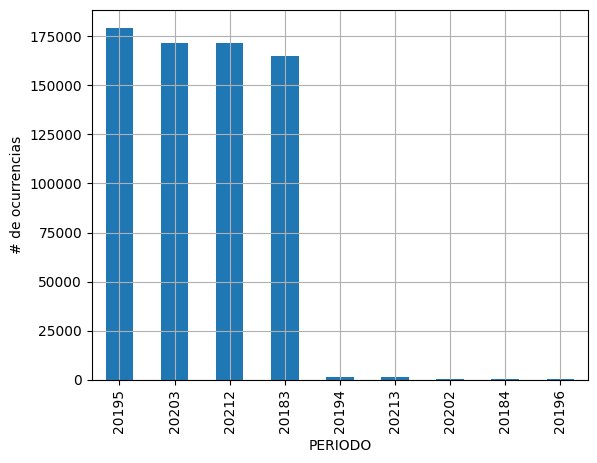

PERIODO
20195    179496
20203    171803
20212    171396
20183    164784
20194      1370
20213      1107
20202       469
20184       254
20196       164
Name: count, dtype: int64

In [ ]:
create_graphic('PERIODO')
graph_df['PERIODO'].value_counts(dropna=False)

**No ahi necesidad de realizar ninguna modificacion a los valores en esta columna**

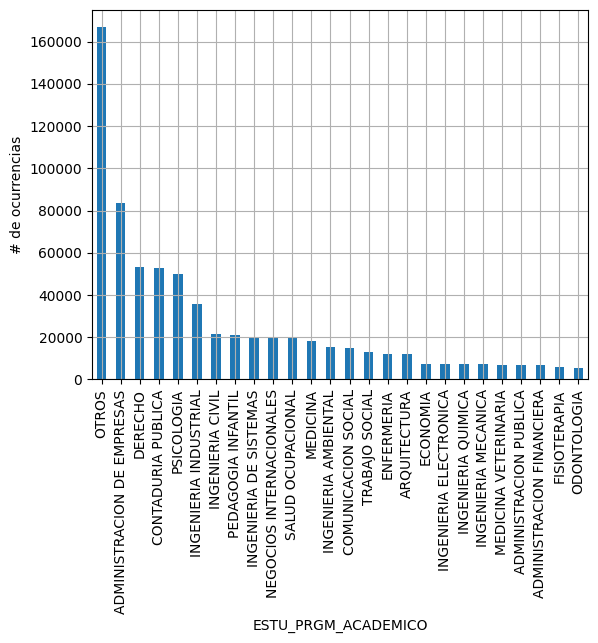

ESTU_PRGM_ACADEMICO
OTROS                         166660
ADMINISTRACION DE EMPRESAS     83639
DERECHO                        53239
CONTADURIA PUBLICA             52827
PSICOLOGIA                     50149
INGENIERIA INDUSTRIAL          35861
INGENIERIA CIVIL               21523
PEDAGOGIA INFANTIL             20877
INGENIERIA DE SISTEMAS         20183
NEGOCIOS INTERNACIONALES       19702
SALUD OCUPACIONAL              19666
MEDICINA                       18078
INGENIERIA AMBIENTAL           15314
COMUNICACION SOCIAL            14693
TRABAJO SOCIAL                 13091
ENFERMERIA                     12176
ARQUITECTURA                   11889
ECONOMIA                        7535
INGENIERIA ELECTRONICA          7300
INGENIERIA QUIMICA              7271
INGENIERIA MECANICA             7255
MEDICINA VETERINARIA            7064
ADMINISTRACION PUBLICA          6821
ADMINISTRACION FINANCIERA       6778
FISIOTERAPIA                    5986
ODONTOLOGIA                     5266
Name: count, dtype: int64

In [ ]:
create_graphic('ESTU_PRGM_ACADEMICO')
graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False)

**No ahi necesidad de realizar ninguna modificacion a los valores en esta columna**

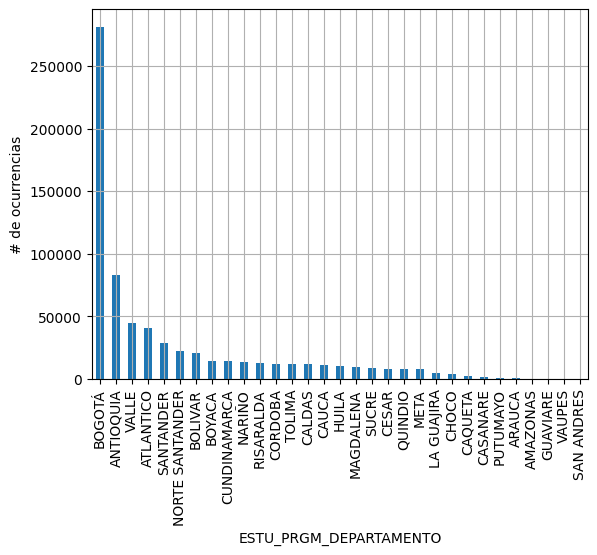

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             281302
ANTIOQUIA           83401
VALLE               44507
ATLANTICO           40934
SANTANDER           28770
NORTE SANTANDER     22547
BOLIVAR             20563
BOYACA              14023
CUNDINAMARCA        13995
NARIÑO              13433
RISARALDA           12652
CORDOBA             12162
TOLIMA              11898
CALDAS              11614
CAUCA               11455
HUILA                9982
MAGDALENA            9495
SUCRE                8674
CESAR                8269
QUINDIO              8221
META                 7897
LA GUAJIRA           4776
CHOCO                4281
CAQUETA              2656
CASANARE             1852
PUTUMAYO              795
ARAUCA                588
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

In [ ]:
create_graphic('ESTU_PRGM_DEPARTAMENTO')
graph_df['ESTU_PRGM_DEPARTAMENTO'].value_counts(dropna=False)

**No ahi necesidad de realizar ninguna modificacion a los valores en esta columna**

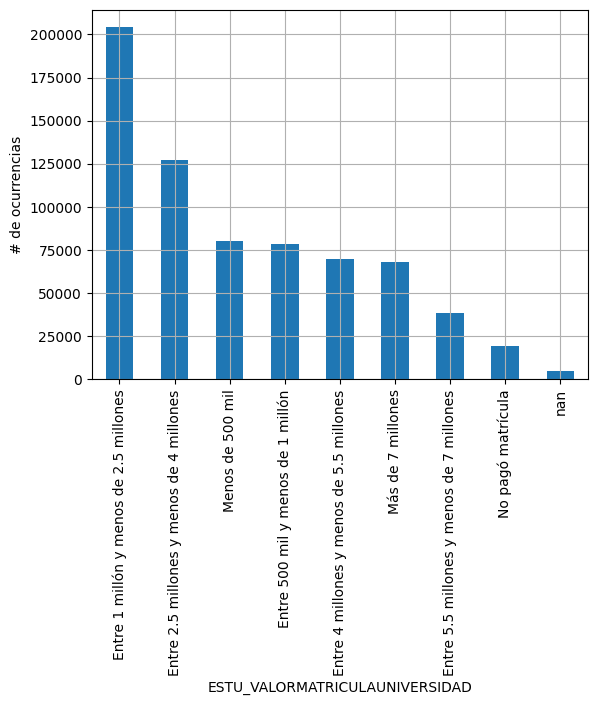

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127428
Menos de 500 mil                             80259
Entre 500 mil y menos de 1 millón            78703
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68013
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
nan                                           4638
Name: count, dtype: int64

In [ ]:
create_graphic('ESTU_VALORMATRICULAUNIVERSIDAD')
graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que convertir los valores nulos a "No pagó matrícula" es la mejor decision a tomar.**

In [ ]:
graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'] = graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'].replace('nan', 'No pagó matrícula')
test['ESTU_VALORMATRICULAUNIVERSIDAD'] = test['ESTU_VALORMATRICULAUNIVERSIDAD'].replace('nan', 'No pagó matrícula')
graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(dropna=False)

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127428
Menos de 500 mil                             80259
Entre 500 mil y menos de 1 millón            78703
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68013
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            24166
Name: count, dtype: int64

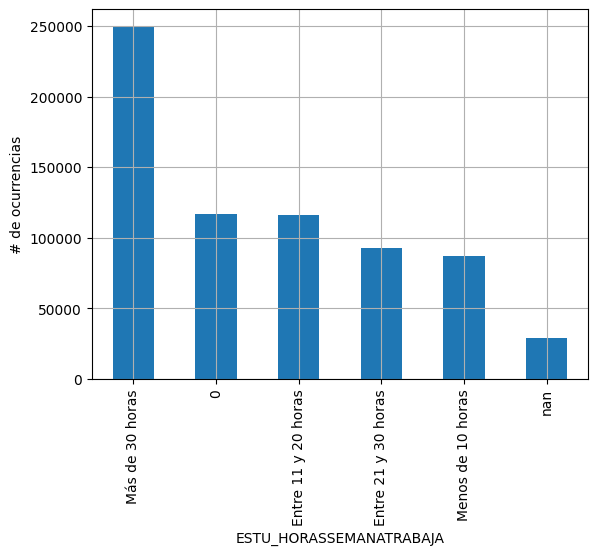

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249351
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87190
nan                     29202
Name: count, dtype: int64

In [ ]:
create_graphic('ESTU_HORASSEMANATRABAJA')
graph_df['ESTU_HORASSEMANATRABAJA'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que convertir los valores nulos a "0" es la mejor decision a tomar.**

In [ ]:
graph_df['ESTU_HORASSEMANATRABAJA'] = graph_df['ESTU_HORASSEMANATRABAJA'].replace('nan', '0')
test['ESTU_HORASSEMANATRABAJA'] = test['ESTU_HORASSEMANATRABAJA'].replace('nan', '0')
graph_df['ESTU_HORASSEMANATRABAJA'].value_counts(dropna=False)

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249351
0                      145752
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87190
Name: count, dtype: int64

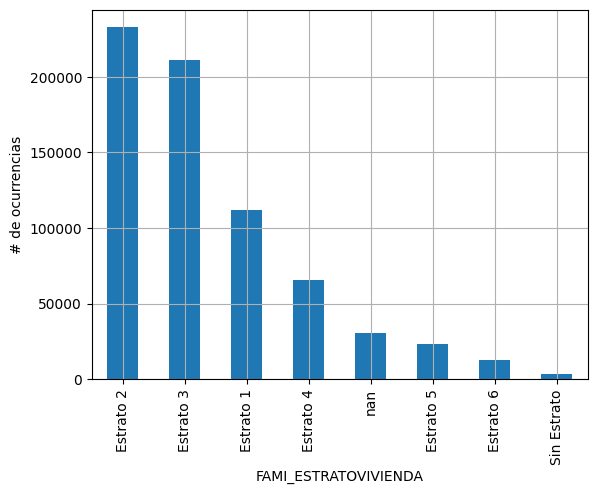

FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
nan             30480
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_ESTRATOVIVIENDA')
graph_df['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que convertir los valores nulos a "Sin Estrato" es la mejor decision a tomar.**

In [ ]:
graph_df['FAMI_ESTRATOVIVIENDA'] = graph_df['FAMI_ESTRATOVIVIENDA'].replace('nan', 'Sin Estrato')
test['FAMI_ESTRATOVIVIENDA'] = test['FAMI_ESTRATOVIVIENDA'].replace('nan', 'Sin Estrato')
graph_df['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Sin Estrato     33769
Estrato 5       23608
Estrato 6       12605
Name: count, dtype: int64

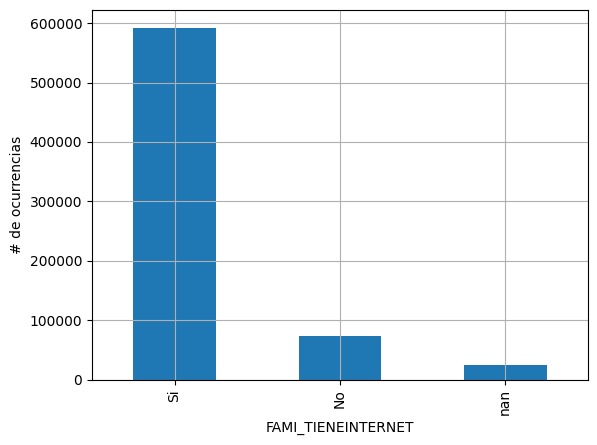

FAMI_TIENEINTERNET
Si     592514
No      73357
nan     24972
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_TIENEINTERNET')
graph_df['FAMI_TIENEINTERNET'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que distribuir los valores nulos a "Si" y "No" es la mejor decision a tomar, un 89% de los nan seran "Si" y el resto seran "No"**

In [ ]:
yes_no_ratio(0.89, 'FAMI_TIENEINTERNET', graph_df)
yes_no_ratio(0.89, 'FAMI_TIENEINTERNET', test)
graph_df['FAMI_TIENEINTERNET'].value_counts(dropna=False)

FAMI_TIENEINTERNET
Si    614739
No     76104
Name: count, dtype: int64

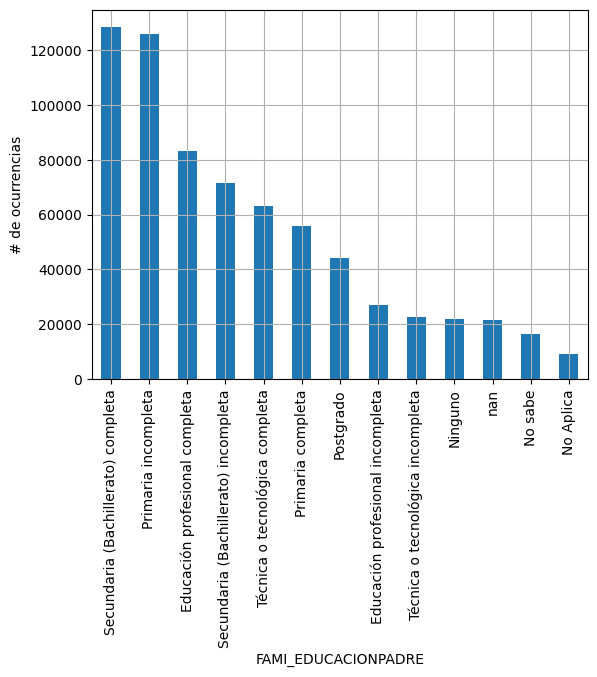

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125673
Educación profesional completa           83116
Secundaria (Bachillerato) incompleta     71652
Técnica o tecnológica completa           62994
Primaria completa                        55958
Postgrado                                44168
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
nan                                      21528
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_EDUCACIONPADRE')
graph_df['FAMI_EDUCACIONPADRE'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que convertir los valores nulos a "No Sabe" es la mejor decision a tomar.**

In [ ]:
graph_df['FAMI_EDUCACIONPADRE'] = graph_df['FAMI_EDUCACIONPADRE'].replace('nan', 'No sabe')
test['FAMI_EDUCACIONPADRE'] = test['FAMI_EDUCACIONPADRE'].replace('nan', 'No sabe')
graph_df['FAMI_EDUCACIONPADRE'].value_counts(dropna=False)

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125673
Educación profesional completa           83116
Secundaria (Bachillerato) incompleta     71652
Técnica o tecnológica completa           62994
Primaria completa                        55958
Postgrado                                44168
No sabe                                  38120
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No Aplica                                 9229
Name: count, dtype: int64

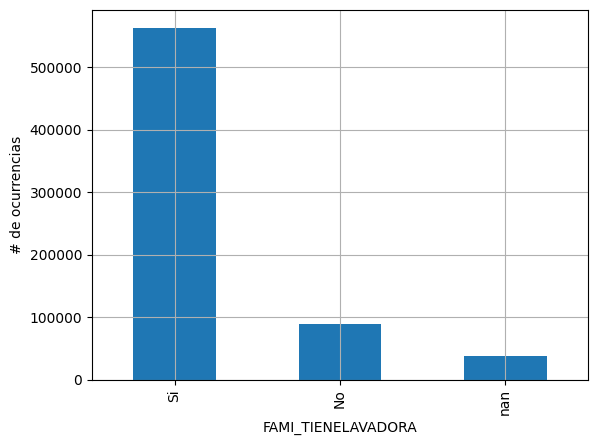

FAMI_TIENELAVADORA
Si     563390
No      89337
nan     38116
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_TIENELAVADORA')
graph_df['FAMI_TIENELAVADORA'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que distribuir los valores nulos a "Si" y "No" es la mejor decision a tomar, un 86% de los nan seran "Si" y el resto seran "No"**

In [ ]:
yes_no_ratio(0.86, 'FAMI_TIENELAVADORA', graph_df)
yes_no_ratio(0.86, 'FAMI_TIENELAVADORA', test)
graph_df['FAMI_TIENELAVADORA'].value_counts(dropna=False)

FAMI_TIENELAVADORA
Si    596169
No     94674
Name: count, dtype: int64

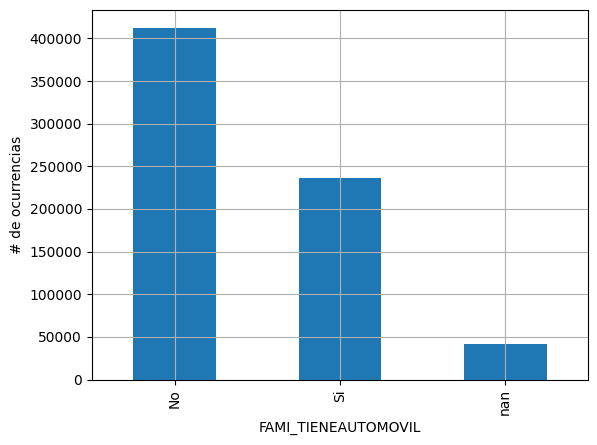

FAMI_TIENEAUTOMOVIL
No     412606
Si     236271
nan     41966
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_TIENEAUTOMOVIL')
graph_df['FAMI_TIENEAUTOMOVIL'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que distribuir los valores nulos a "Si" y "No" es la mejor decision a tomar, un 36% de los nan seran "Si" y el resto seran "No"**

In [ ]:
yes_no_ratio(0.36, 'FAMI_TIENEAUTOMOVIL', graph_df)
yes_no_ratio(0.36, 'FAMI_TIENEAUTOMOVIL', test)
graph_df['FAMI_TIENEAUTOMOVIL'].value_counts(dropna=False)

FAMI_TIENEAUTOMOVIL
No    439465
Si    251378
Name: count, dtype: int64

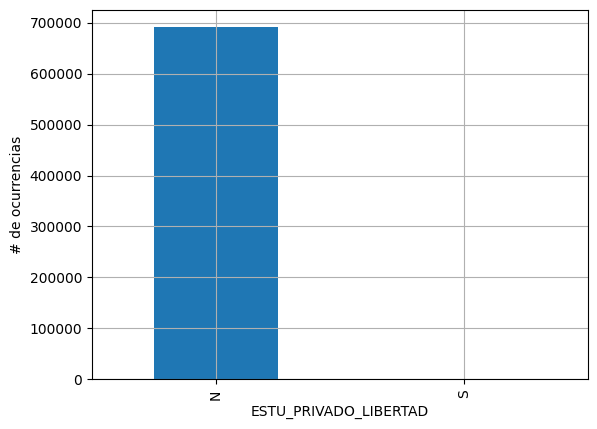

ESTU_PRIVADO_LIBERTAD
N    690835
S         8
Name: count, dtype: int64

In [ ]:
create_graphic('ESTU_PRIVADO_LIBERTAD')
graph_df['ESTU_PRIVADO_LIBERTAD'].value_counts(dropna=False)

**No ahi necesidad de realizar ninguna modificacion a los valores en esta columna**

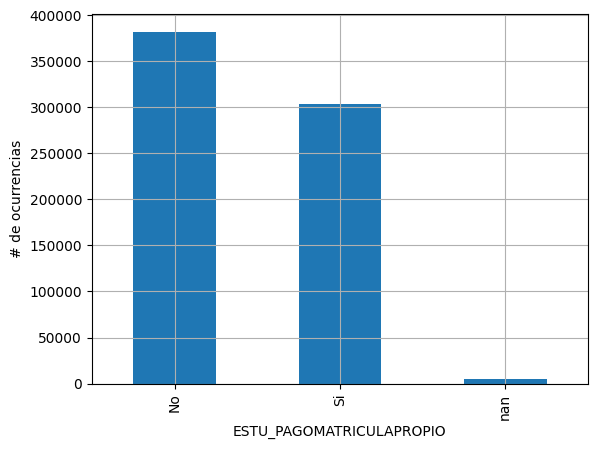

ESTU_PAGOMATRICULAPROPIO
No     382201
Si     303801
nan      4841
Name: count, dtype: int64

In [ ]:
create_graphic('ESTU_PAGOMATRICULAPROPIO')
graph_df['ESTU_PAGOMATRICULAPROPIO'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que distribuir los valores nulos a "Si" y "No" es la mejor decision a tomar, un 44% de los nan seran "Si" y el resto seran "No"**

In [ ]:
yes_no_ratio(0.44, 'ESTU_PAGOMATRICULAPROPIO', graph_df)
yes_no_ratio(0.44, 'ESTU_PAGOMATRICULAPROPIO', test)
graph_df['ESTU_PAGOMATRICULAPROPIO'].value_counts(dropna=False)

ESTU_PAGOMATRICULAPROPIO
No    384912
Si    305931
Name: count, dtype: int64

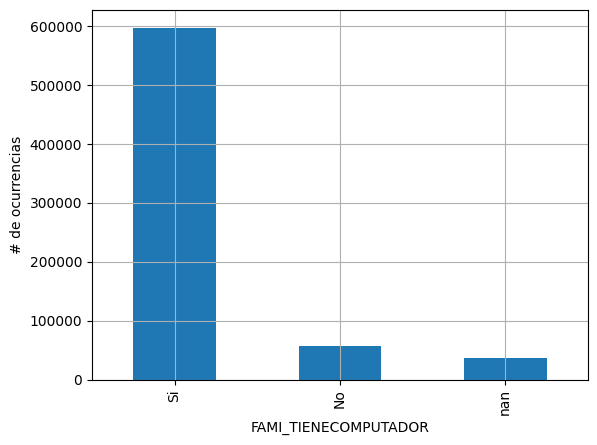

FAMI_TIENECOMPUTADOR
Si     597670
No      56727
nan     36446
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_TIENECOMPUTADOR')
graph_df['FAMI_TIENECOMPUTADOR'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que distribuir los valores nulos a "Si" y "No" es la mejor decision a tomar, un 91% de los nan seran "Si" y el resto seran "No"**

In [ ]:
yes_no_ratio(0.91, 'FAMI_TIENECOMPUTADOR', graph_df)
yes_no_ratio(0.91, 'FAMI_TIENECOMPUTADOR', test)
graph_df['FAMI_TIENECOMPUTADOR'].value_counts(dropna=False)

FAMI_TIENECOMPUTADOR
Si    630835
No     60008
Name: count, dtype: int64

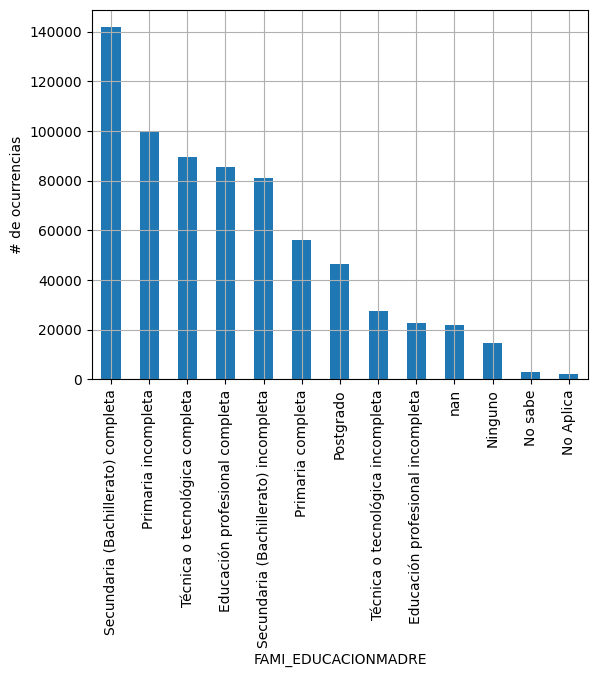

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56124
Postgrado                                46246
Técnica o tecnológica incompleta         27533
Educación profesional incompleta         22470
nan                                      22008
Ninguno                                  14483
No sabe                                   3017
No Aplica                                 1918
Name: count, dtype: int64

In [ ]:
create_graphic('FAMI_EDUCACIONMADRE')
graph_df['FAMI_EDUCACIONMADRE'].value_counts(dropna=False)

**Asumiendo que es mas importante tener una mayor cantidad de datos para un mejor modelo, ignoraremos la idea de eliminar las filas. A su vez asumiremos que convertir los valores nulos a "No Sabe" es la mejor decision a tomar.**

In [ ]:
graph_df['FAMI_EDUCACIONMADRE'] = graph_df['FAMI_EDUCACIONMADRE'].replace('nan', 'No sabe')
test['FAMI_EDUCACIONMADRE'] = test['FAMI_EDUCACIONMADRE'].replace('nan', 'No sabe')
graph_df['FAMI_EDUCACIONMADRE'].value_counts(dropna=False)

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56124
Postgrado                                46246
Técnica o tecnológica incompleta         27533
No sabe                                  25025
Educación profesional incompleta         22470
Ninguno                                  14483
No Aplica                                 1918
Name: count, dtype: int64

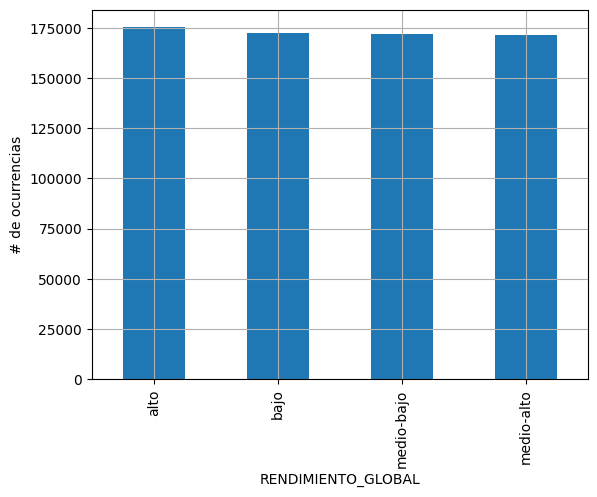

RENDIMIENTO_GLOBAL
alto          175215
bajo          172558
medio-bajo    171853
medio-alto    171217
Name: count, dtype: int64

In [ ]:
create_graphic('RENDIMIENTO_GLOBAL')
graph_df['RENDIMIENTO_GLOBAL'].value_counts(dropna=False)

**No ahi necesidad de realizar ninguna modificacion a los valores en esta columna**

# **Mapeo y conversion de variables Categoricas**
Ya que se ha realizado la limpieza y analisis de los datos sera momento de convertir todos los valores a numericos.

En este caso deberemos primero analizar cuales categorias podemos considerar como ordenadas en el caso de nuestra data, las columnas **RENDIMIENTO_GLOBAL**,
 **PERIODO**, **ESTU_VALORMATRICULAUNIVERSIDAD**, **ESTU_HORASSEMANATRABAJA**, **FAMI_ESTRATOVIVIENDA**, **FAMI_EDUCACIONPADRE** y **FAMI_EDUCACIONMADRE** se consideraran como ordenadas.

Columnas como **FAMI_TIENELAVADORA**, **FAMI_TIENEINTERNET**, **FAMI_TIENEAUTOMOVIL**, **FAMI_TIENECOMPUTADOR**, **ESTU_PAGOMATRICULAPROPIO** y **ESTU_PRIVADO_LIBERTAD** se pueden convertir directamente a numeros binarios, 0 para No y 1 para Si.

Para las columnas **ESTU_PRGM_ACADEMICO**, **ESTU_PRGM_DEPARTAMENTO** se realizara One-Hot ya que no existe un orden definido en los valores.

In [ ]:
graph_df['RENDIMIENTO_GLOBAL'].value_counts(dropna=False)

RENDIMIENTO_GLOBAL
alto          175215
bajo          172558
medio-bajo    171853
medio-alto    171217
Name: count, dtype: int64

Como los datos de rendimiento global van de bajo rendimiento a alto rendimiento, podremos considerarlo ordenado donde bajo es 0 y los demas valores van ascendiendo hasta llegar a 3 con alto.

In [ ]:
mapeo = {
    'alto': 3,
    'medio-alto': 2,
    'medio-bajo': 1,
    'bajo': 0
}

graph_df['RENDIMIENTO_GLOBAL'] = graph_df['RENDIMIENTO_GLOBAL'].map(mapeo)

In [ ]:
graph_df['PERIODO'].value_counts(dropna=False)

PERIODO
20195    179496
20203    171803
20212    171396
20183    164784
20194      1370
20213      1107
20202       469
20184       254
20196       164
Name: count, dtype: int64

Los datos de periodo van desde 20183 hasta 20213, podremos considerarlo ordenado donde 20183 es el periodo mas antiguo y por tanto sera 0, y 20213 es el periodo mas nuevo y por tanto sera el valor mas alto, en este caso 8.

In [ ]:
mapeo = {
    20213: 8,
    20212: 7,
    20203: 6,
    20202: 5,
    20196: 4,
    20195: 3,
    20194: 2,
    20184: 1,
    20183: 0
}

graph_df['PERIODO'] = graph_df['PERIODO'].map(mapeo)
test['PERIODO'] = test['PERIODO'].map(mapeo)

In [ ]:
graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts(dropna=False)

ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127428
Menos de 500 mil                             80259
Entre 500 mil y menos de 1 millón            78703
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68013
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            24166
Name: count, dtype: int64

Los datos de valor matricula universidad van desde no costo hasta un costo mayor de 7 millones, podremos considerarlo ordenado donde "No pago matricula" es 0 y los demas rangos de precios ascienden hasta llegar a "Más de 7 millones" que es 7.

In [ ]:
mapeo = {
    'Más de 7 millones': 7,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 500 mil y menos de 1 millón': 2,
    'Menos de 500 mil': 1,
    'No pagó matrícula': 0
}

graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'] = graph_df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapeo)
test['ESTU_VALORMATRICULAUNIVERSIDAD'] = test['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapeo)

In [ ]:
graph_df['ESTU_HORASSEMANATRABAJA'].value_counts(dropna=False)

ESTU_HORASSEMANATRABAJA
Más de 30 horas        249351
0                      145752
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87190
Name: count, dtype: int64

Los datos de horas trabajadas en la semana van desde 0 hasta mas de 30, podremos considerarlo ordenado donde 0 se mantiene como 0 y los demas rangos de trabajo ascienden hasta llegar a "Más de 30 horas" que es 4.

In [ ]:
mapeo = {
    'Más de 30 horas': 4,
    'Entre 21 y 30 horas': 3,
    'Entre 11 y 20 horas': 2,
    'Menos de 10 horas': 1,
    '0': 0
}

graph_df['ESTU_HORASSEMANATRABAJA'] = graph_df['ESTU_HORASSEMANATRABAJA'].map(mapeo)
test['ESTU_HORASSEMANATRABAJA'] = test['ESTU_HORASSEMANATRABAJA'].map(mapeo)

In [ ]:
graph_df['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Sin Estrato     33769
Estrato 5       23608
Estrato 6       12605
Name: count, dtype: int64

Los datos de estrato vivienda van desde sin estrato hasta estrato 6, podremos considerarlo ordenado donde 0 sera "Sin Estrato" y los demas seguiran el patron del estrato al que pertenece la persona.

In [ ]:
mapeo = {
    'Estrato 6': 6,
    'Estrato 5': 5,
    'Estrato 4': 4,
    'Estrato 3': 3,
    'Estrato 2': 2,
    'Estrato 1': 1,
    'Sin Estrato': 0
}

graph_df['FAMI_ESTRATOVIVIENDA'] = graph_df['FAMI_ESTRATOVIVIENDA'].map(mapeo)
test['FAMI_ESTRATOVIVIENDA'] = test['FAMI_ESTRATOVIVIENDA'].map(mapeo)

In [ ]:
graph_df['FAMI_TIENELAVADORA'].value_counts(dropna=False)

FAMI_TIENELAVADORA
Si    596169
No     94674
Name: count, dtype: int64

Se realiza conversion binaria a todos las columnas que tienen Si y No como datos unicos, donde No es 0 y Si es 1.

In [ ]:
mapeo = {
    'Si': 1,
    'No': 0
}

graph_df['FAMI_TIENELAVADORA'] = graph_df['FAMI_TIENELAVADORA'].map(mapeo)
graph_df['FAMI_TIENEINTERNET'] = graph_df['FAMI_TIENEINTERNET'].map(mapeo)
graph_df['FAMI_TIENEAUTOMOVIL'] = graph_df['FAMI_TIENEAUTOMOVIL'].map(mapeo)
graph_df['FAMI_TIENECOMPUTADOR'] = graph_df['FAMI_TIENECOMPUTADOR'].map(mapeo)
graph_df['ESTU_PAGOMATRICULAPROPIO'] = graph_df['ESTU_PAGOMATRICULAPROPIO'].map(mapeo)
test['FAMI_TIENELAVADORA'] = test['FAMI_TIENELAVADORA'].map(mapeo)
test['FAMI_TIENEINTERNET'] = test['FAMI_TIENEINTERNET'].map(mapeo)
test['FAMI_TIENEAUTOMOVIL'] = test['FAMI_TIENEAUTOMOVIL'].map(mapeo)
test['FAMI_TIENECOMPUTADOR'] = test['FAMI_TIENECOMPUTADOR'].map(mapeo)
test['ESTU_PAGOMATRICULAPROPIO'] = test['ESTU_PAGOMATRICULAPROPIO'].map(mapeo)

In [ ]:
graph_df['ESTU_PRIVADO_LIBERTAD'].value_counts(dropna=False)

ESTU_PRIVADO_LIBERTAD
N    690835
S         8
Name: count, dtype: int64

In [ ]:
mapeo = {
    'S': 1,
    'N': 0
}

graph_df['ESTU_PRIVADO_LIBERTAD'] = graph_df['ESTU_PRIVADO_LIBERTAD'].map(mapeo)
test['ESTU_PRIVADO_LIBERTAD'] = test['ESTU_PRIVADO_LIBERTAD'].map(mapeo)

In [ ]:
graph_df['FAMI_EDUCACIONPADRE'].value_counts(dropna=False)

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125673
Educación profesional completa           83116
Secundaria (Bachillerato) incompleta     71652
Técnica o tecnológica completa           62994
Primaria completa                        55958
Postgrado                                44168
No sabe                                  38120
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No Aplica                                 9229
Name: count, dtype: int64

In [ ]:
graph_df['FAMI_EDUCACIONMADRE'].value_counts(dropna=False)

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56124
Postgrado                                46246
Técnica o tecnológica incompleta         27533
No sabe                                  25025
Educación profesional incompleta         22470
Ninguno                                  14483
No Aplica                                 1918
Name: count, dtype: int64

In [ ]:
mapeo = {
    'Postgrado': 11,
    'Educación profesional completa': 10,
    'Educación profesional incompleta': 9,
    'Técnica o tecnológica completa': 8,
    'Técnica o tecnológica incompleta': 7,
    'Secundaria (Bachillerato) completa': 6,
    'Secundaria (Bachillerato) incompleta': 5,
    'Primaria completa': 4,
    'Primaria incompleta': 3,
    'Ninguno': 2,
    'No sabe': 1,
    'No Aplica': 0
}

graph_df['FAMI_EDUCACIONPADRE'] = graph_df['FAMI_EDUCACIONPADRE'].map(mapeo)
graph_df['FAMI_EDUCACIONMADRE'] = graph_df['FAMI_EDUCACIONMADRE'].map(mapeo)
test['FAMI_EDUCACIONPADRE'] = test['FAMI_EDUCACIONPADRE'].map(mapeo)
test['FAMI_EDUCACIONMADRE'] = test['FAMI_EDUCACIONMADRE'].map(mapeo)

Crearemos una copia del graph_df que llamaremos train, este sera el dataframe final que usaremos para entrenar el modelo final y usaremos graph_df para hacer un ultimo analisis de la correlación entre los valores.

In [ ]:
train = graph_df.copy()
train

ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0       904256        7                  ENFERMERIA                 BOGOTÁ   
1       645256        7                     DERECHO              ATLANTICO   
2       308367        6                       OTROS                 BOGOTÁ   
3       470353        3  ADMINISTRACION DE EMPRESAS              SANTANDER   
4       989032        7                  PSICOLOGIA              ANTIOQUIA   
...        ...      ...                         ...                    ...   
690838   25096        3                       OTROS             LA GUAJIRA   
690839  754213        7                  PSICOLOGIA        NORTE SANTANDER   
690840  504185        0           SALUD OCUPACIONAL                 BOGOTÁ   
690841  986620        3                  PSICOLOGIA                 TOLIMA   
690842  933374        3                  PSICOLOGIA              ANTIOQUIA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                    6                        1   
1                                    4                        0   
2                                    4                        4   
3                                    5                        0   
4                                    4                        3   
...                                ...                      ...   
690838                               2                        2   
690839                               4                        4   
690840                               3                        1   
690841                               4                        1   
690842                               6                        4   

        FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                          3                   1                    7   
1                          3                   0                    8   
2                          3                   1                    6   
3                          4                   1                    1   
4                          3                   1                    4   
...                      ...                 ...                  ...   
690838                     2                   1                    6   
690839                     3                   1                    3   
690840                     3                   1                    6   
690841                     1                   0                    4   
690842                     4                   1                    6   

        FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PRIVADO_LIBERTAD  \
0                        1                    1                      0   
1                        1                    0                      0   
2                        1                    0                      0   
3                        1                    0                      0   
4                        1                    1                      0   
...                    ...                  ...                    ...   
690838                   1                    0                      0   
690839                   1                    0                      0   
690840                   1                    0                      0   
690841                   0                    0                      0   
690842                   1                    1                      0   

        ESTU_PAGOMATRICULAPROPIO  FAMI_TIENECOMPUTADOR  FAMI_EDUCACIONMADRE  \
0                              0                     1                   11   
1                              0                     1                    7   
2                              0                     0                    6   
3                              0                     1                    6   
4                              0                     1                    4   
...                          .

Para realizar el analisis de la correlacion entre datos usaremos valores numericos en las columnas de Programa academico y programa departamento, y solo se realizara este cambio numerico en graph_df

In [ ]:
graph_df['ESTU_PRGM_ACADEMICO'].value_counts(dropna=False)

ESTU_PRGM_ACADEMICO
OTROS                         166660
ADMINISTRACION DE EMPRESAS     83639
DERECHO                        53239
CONTADURIA PUBLICA             52827
PSICOLOGIA                     50149
INGENIERIA INDUSTRIAL          35861
INGENIERIA CIVIL               21523
PEDAGOGIA INFANTIL             20877
INGENIERIA DE SISTEMAS         20183
NEGOCIOS INTERNACIONALES       19702
SALUD OCUPACIONAL              19666
MEDICINA                       18078
INGENIERIA AMBIENTAL           15314
COMUNICACION SOCIAL            14693
TRABAJO SOCIAL                 13091
ENFERMERIA                     12176
ARQUITECTURA                   11889
ECONOMIA                        7535
INGENIERIA ELECTRONICA          7300
INGENIERIA QUIMICA              7271
INGENIERIA MECANICA             7255
MEDICINA VETERINARIA            7064
ADMINISTRACION PUBLICA          6821
ADMINISTRACION FINANCIERA       6778
FISIOTERAPIA                    5986
ODONTOLOGIA                     5266
Name: count, dtype: int64

In [ ]:
mapeo = {
    'ADMINISTRACION DE EMPRESAS': 25,
    'DERECHO': 24,
    'CONTADURIA PUBLICA': 23,
    'PSICOLOGIA': 22,
    'INGENIERIA INDUSTRIAL': 21,
    'INGENIERIA CIVIL': 20,
    'PEDAGOGIA INFANTIL': 19,
    'INGENIERIA DE SISTEMAS': 18,
    'NEGOCIOS INTERNACIONALES': 17,
    'SALUD OCUPACIONAL': 16,
    'MEDICINA': 15,
    'INGENIERIA AMBIENTAL': 14,
    'COMUNICACION SOCIAL': 13,
    'TRABAJO SOCIAL': 12,
    'ENFERMERIA': 11,
    'ARQUITECTURA': 10,
    'ECONOMIA': 9,
    'INGENIERIA ELECTRONICA': 8,
    'INGENIERIA QUIMICA': 7,
    'INGENIERIA MECANICA': 6,
    'MEDICINA VETERINARIA': 5,
    'ADMINISTRACION PUBLICA': 4,
    'ADMINISTRACION FINANCIERA': 3,
    'FISIOTERAPIA': 2,
    'ODONTOLOGIA': 1,
    'OTROS': 0
}

graph_df['ESTU_PRGM_ACADEMICO'] = graph_df['ESTU_PRGM_ACADEMICO'].map(mapeo)

In [ ]:
graph_df['ESTU_PRGM_DEPARTAMENTO'].value_counts(dropna=False)

ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             281302
ANTIOQUIA           83401
VALLE               44507
ATLANTICO           40934
SANTANDER           28770
NORTE SANTANDER     22547
BOLIVAR             20563
BOYACA              14023
CUNDINAMARCA        13995
NARIÑO              13433
RISARALDA           12652
CORDOBA             12162
TOLIMA              11898
CALDAS              11614
CAUCA               11455
HUILA                9982
MAGDALENA            9495
SUCRE                8674
CESAR                8269
QUINDIO              8221
META                 7897
LA GUAJIRA           4776
CHOCO                4281
CAQUETA              2656
CASANARE             1852
PUTUMAYO              795
ARAUCA                588
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64

In [ ]:
mapeo = {
    'SAN ANDRES': 30,
    'VAUPES': 29,
    'GUAVIARE': 28,
    'AMAZONAS': 27,
    'ARAUCA': 26,
    'PUTUMAYO': 25,
    'CASANARE': 24,
    'CAQUETA': 23,
    'CHOCO': 22,
    'LA GUAJIRA': 21,
    'META': 20,
    'QUINDIO': 19,
    'CESAR': 18,
    'SUCRE': 17,
    'MAGDALENA': 16,
    'HUILA': 15,
    'CAUCA': 14,
    'CALDAS': 13,
    'TOLIMA': 12,
    'CORDOBA': 11,
    'RISARALDA': 10,
    'NARIÑO': 9,
    'CUNDINAMARCA': 8,
    'BOYACA': 7,
    'BOLIVAR': 6,
    'NORTE SANTANDER': 5,
    'SANTANDER': 4,
    'ATLANTICO': 3,
    'VALLE': 2,
    'ANTIOQUIA': 1,
    'BOGOTÁ': 0
}

graph_df['ESTU_PRGM_DEPARTAMENTO'] = graph_df['ESTU_PRGM_DEPARTAMENTO'].map(mapeo)

In [ ]:
graph_df

ID  PERIODO  ESTU_PRGM_ACADEMICO  ESTU_PRGM_DEPARTAMENTO  \
0       904256        7                   11                       0   
1       645256        7                   24                       3   
2       308367        6                    0                       0   
3       470353        3                   25                       4   
4       989032        7                   22                       1   
...        ...      ...                  ...                     ...   
690838   25096        3                    0                      21   
690839  754213        7                   22                       5   
690840  504185        0                   16                       0   
690841  986620        3                   22                      12   
690842  933374        3                   22                       1   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                    6                        1   
1                                    4                        0   
2                                    4                        4   
3                                    5                        0   
4                                    4                        3   
...                                ...                      ...   
690838                               2                        2   
690839                               4                        4   
690840                               3                        1   
690841                               4                        1   
690842                               6                        4   

        FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                          3                   1                    7   
1                          3                   0                    8   
2                          3                   1                    6   
3                          4                   1                    1   
4                          3                   1                    4   
...                      ...                 ...                  ...   
690838                     2                   1                    6   
690839                     3                   1                    3   
690840                     3                   1                    6   
690841                     1                   0                    4   
690842                     4                   1                    6   

        FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PRIVADO_LIBERTAD  \
0                        1                    1                      0   
1                        1                    0                      0   
2                        1                    0                      0   
3                        1                    0                      0   
4                        1                    1                      0   
...                    ...                  ...                    ...   
690838                   1                    0                      0   
690839                   1                    0                      0   
690840                   1                    0                      0   
690841                   0                    0                      0   
690842                   1                    1                      0   

        ESTU_PAGOMATRICULAPROPIO  FAMI_TIENECOMPUTADOR  FAMI_EDUCACIONMADRE  \
0                              0                     1                   11   
1                              0                     1                    7   
2                              0                     0                    6   
3                              0                     1                    6   
4                              0                     1                    4   
...                          ...                   ...                  ...   
690838                 

In [ ]:
graph_df.dtypes

ID                                int64
PERIODO                           int64
ESTU_PRGM_ACADEMICO               int64
ESTU_PRGM_DEPARTAMENTO            int64
ESTU_VALORMATRICULAUNIVERSIDAD    int64
ESTU_HORASSEMANATRABAJA           int64
FAMI_ESTRATOVIVIENDA              int64
FAMI_TIENEINTERNET                int64
FAMI_EDUCACIONPADRE               int64
FAMI_TIENELAVADORA                int64
FAMI_TIENEAUTOMOVIL               int64
ESTU_PRIVADO_LIBERTAD             int64
ESTU_PAGOMATRICULAPROPIO          int64
FAMI_TIENECOMPUTADOR              int64
FAMI_EDUCACIONMADRE               int64
RENDIMIENTO_GLOBAL                int64
dtype: object

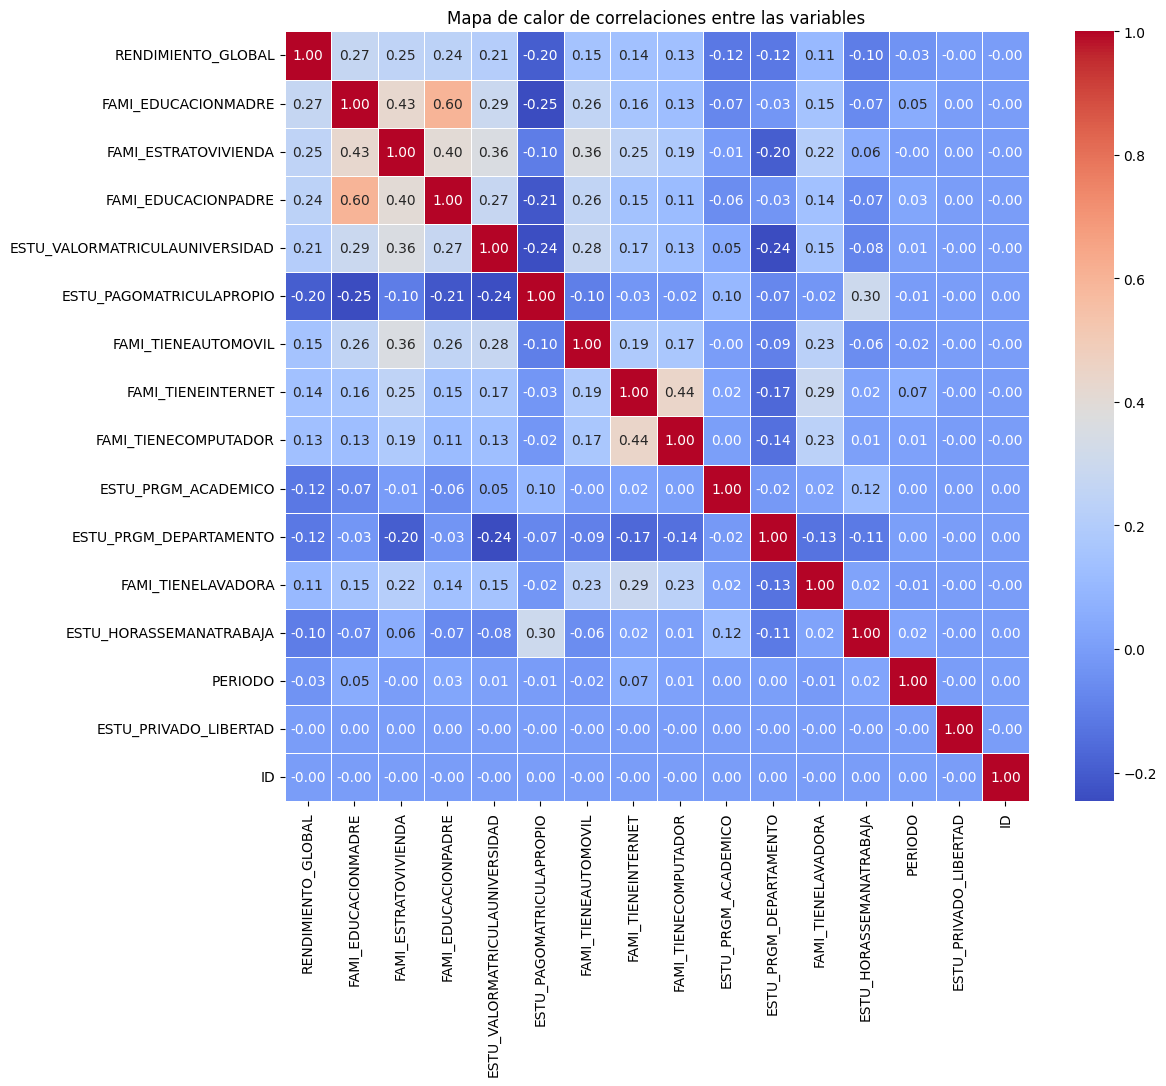

In [ ]:

numeric_cols = graph_df.select_dtypes(include=['int','float']).columns
correlation_matrix = graph_df[numeric_cols].corrwith(graph_df['RENDIMIENTO_GLOBAL'])
correlation_matrix_abs = correlation_matrix.abs().sort_values(ascending=False)
correlation_matrix = graph_df[correlation_matrix_abs.index].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Mapa de calor de correlaciones entre las variables")
plt.show()

De la tabla anterior de correlaciones podemos ver que la gran mayoria tiene un impacto bajo en la variable respuesta, donde las variables que mayor influencia tienen en el rendimiento global son la educacion de la madre, estrato de vivienda, la educacion del padre, valor de la matricula y pago de matricula propia, entre estas 5 variables, las primeras 4 muestran una relacion positiva, cuanto mas alta sea la educacion de madre y padre, el estrato de vivienda y el costo de la matricula, se tendra un pequeño incremento en el rendimiento academico, mientras que la quinta, pago de matricula propia muestra una relacion negativa, disminuyendo el rendimiento si el estudiante paga su propia matricula.

A su vez podemos observar que la variable con el menor impacto fuera del ID, ya que ese no tiene efecto real en el rendimiento, es la variable que define si el estudiante a sido privado de su libertad, que demuestra nulo efecto sobre todas las demas variables.

A su vez podemos ver unas cuantas correlaciones entre otras variables, como que la educacion de la madre y del padre estan fuertemente correlacionadas, a su vez los estudios de los padres tienen una mediana correlacion con el estrato de estudiante, finalmente ahi una correlacion media entre tener internet y tener un computador.

Podemos realizar drop en las columnas de ID y ESTU_PRIVADO_LIBERTAD ya que sus efectos no son lo suficientemente significativos en la variable de respuesta

In [ ]:
train = train.drop('ID', axis=1)
train = train.drop('ESTU_PRIVADO_LIBERTAD', axis=1)
test = test.drop('ID', axis=1)
test = test.drop('ESTU_PRIVADO_LIBERTAD', axis=1)

# **Finalizacion del train dataframe**

Finalmente realizamos one hot a las columnas de programa departamento y programa academico en el dataframe de train

In [ ]:
def onehot(df, programa):
  places = df[programa].value_counts(dropna=False).index
  hot = pd.Series(np.zeros(len(df[programa])))
  df_list = df[programa].to_list()
  for i in range(len(places)):
    hot.name = programa+'_'+places[i]
    for j in range(len(hot)):
      if (places[i] == df_list[j]):
        hot[j] = 1
      else:
        hot[j] = 0
    df = pd.concat([df,hot],axis=1)
  df = df.drop(programa, axis=1)
  return df

In [ ]:
train = onehot(train, 'ESTU_PRGM_DEPARTAMENTO')
test = onehot(test, 'ESTU_PRGM_DEPARTAMENTO')

In [ ]:
train = onehot(train, 'ESTU_PRGM_ACADEMICO')
test = onehot(test, 'ESTU_PRGM_ACADEMICO')

In [ ]:
# Itera sobre todas las columnas y cambia el tipo de datos si es float64
for columna in train.columns:
    if train.dtypes[columna] == 'float64':
        train[columna] = train[columna].astype(np.int64)
for columna in test.columns:
    if test.dtypes[columna] == 'float64':
        test[columna] = test[columna].astype(np.int64)

# **Dataframes terminados del Train y del Test**

In [ ]:
column_to_move = train.pop("RENDIMIENTO_GLOBAL")
train.insert(len(train.columns), "RENDIMIENTO_GLOBAL", column_to_move)
train

PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0             7                               6                        1   
1             7                               4                        0   
2             6                               4                        4   
3             3                               5                        0   
4             7                               4                        3   
...         ...                             ...                      ...   
690838        3                               2                        2   
690839        7                               4                        4   
690840        0                               3                        1   
690841        3                               4                        1   
690842        3                               6                        4   

        FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                          3                   1                    7   
1                          3                   0                    8   
2                          3                   1                    6   
3                          4                   1                    1   
4                          3                   1                    4   
...                      ...                 ...                  ...   
690838                     2                   1                    6   
690839                     3                   1                    3   
690840                     3                   1                    6   
690841                     1                   0                    4   
690842                     4                   1                    6   

        FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PAGOMATRICULAPROPIO  \
0                        1                    1                         0   
1                        1                    0                         0   
2                        1                    0                         0   
3                        1                    0                         0   
4                        1                    1                         0   
...                    ...                  ...                       ...   
690838                   1                    0                         1   
690839                   1                    0                         0   
690840                   1                    0                         1   
690841                   0                    0                         1   
690842                   1                    1                         0   

        FAMI_TIENECOMPUTADOR  ...  ESTU_PRGM_ACADEMICO_ECONOMIA  \
0                          1  ...                             0   
1                          1  ...                             0   
2                          0  ...                             0   
3                          1  ...                             0   
4                          1  ...                             0   
...                      ...  ...                           ...   
690838                     1  ...                             0   
690839                     1  ...                             0   
690840                     1  ...                             0   
690841                     1  ...                             0   
690842                     1  ...                             0   

        ESTU_PRGM_ACADEMICO_INGENIERIA ELECTRONICA  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
690838                                           0   
690839                                           0   
69

In [ ]:
test

PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0             0                               1                        1   
1             6                               4                        3   
2             7                               3                        0   
3             3                               3                        3   
4             7                               4                        2   
...         ...                             ...                      ...   
296781        3                               4                        4   
296782        0                               3                        0   
296783        7                               4                        4   
296784        3                               6                        2   
296785        7                               0                        0   

        FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                          3                   1                    8   
1                          2                   1                    6   
2                          3                   1                    5   
3                          1                   0                    3   
4                          2                   1                    6   
...                      ...                 ...                  ...   
296781                     1                   1                    3   
296782                     4                   1                   10   
296783                     3                   1                    6   
296784                     3                   1                   10   
296785                     3                   1                    6   

        FAMI_TIENELAVADORA  FAMI_TIENEAUTOMOVIL  ESTU_PAGOMATRICULAPROPIO  \
0                        1                    0                         1   
1                        1                    0                         0   
2                        1                    0                         0   
3                        1                    0                         0   
4                        1                    0                         0   
...                    ...                  ...                       ...   
296781                   1                    1                         1   
296782                   1                    0                         0   
296783                   1                    0                         0   
296784                   1                    0                         0   
296785                   1                    1                         0   

        FAMI_TIENECOMPUTADOR  ...  ESTU_PRGM_ACADEMICO_ARQUITECTURA  \
0                          1  ...                                 0   
1                          1  ...                                 0   
2                          1  ...                                 0   
3                          0  ...                                 0   
4                          1  ...                                 0   
...                      ...  ...                               ...   
296781                     1  ...                                 0   
296782                     1  ...                                 0   
296783                     1  ...                                 0   
296784                     1  ...                                 0   
296785                     1  ...                                 0   

        ESTU_PRGM_ACADEMICO_INGENIERIA QUIMICA  ESTU_PRGM_ACADEMICO_ECONOMIA  \
0                                            0                             0   
1                                            0                             0   
2                                            0                             0   
3                                            0                             0   
4                                       

# **Entrenamiento del modelo**

Se comenzara dividiendo el dataframe del train en numpy arrays de X y Y

In [ ]:
X = train.values[:,:-1]
y = train["RENDIMIENTO_GLOBAL"].values
print (X.shape, y.shape)

(690843, 68) (690843,)


Dividimos el X y Y en, X train, X test, y train, y test, los train se usaran para entrenar el modelo en este caso un Random Forest Classifier y usaremos el test para comprobar la efectividad del modelo como tal.

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.3)
print (Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(483590, 68) (483590,) (207253, 68) (207253,)


Creamos y entrenamos el modelo con nuestros datos de entrenamiento

In [ ]:
estimator = RandomForestClassifier(n_estimators=350, max_depth=20)
estimator.fit(Xtr,ytr)

RandomForestClassifier(max_depth=20, n_estimators=350)

Probamos nuestro modelo con los datos de test

In [ ]:
print ("train accuracy %.4f"%estimator.score(Xtr,ytr))
print ("test accuracy  %.4f"%estimator.score(Xts,yts))

train accuracy 0.6230
test accuracy  0.4180


Si los resultados del test son de nuestro agrado, organizaremos los datos para hacer una entrega a Kaggle

# **Entrega a Kaggle**

Usaremos el test.csv y despues de realizarle todo el mismo tratamiento que se le hizo al train.csv, podremos usarlo para realizar predicciones y tener un valor para enviar a Kaggle

In [ ]:
answer = test.values
preds = estimator.predict(answer)
preds

array([0, 2, 3, ..., 2, 3, 3])

Organizamos un dataframe con el ID y el rendimiento obtenido de la prediccion

In [ ]:
submission = pd.DataFrame([testID.ID, pd.Series(preds, name="RENDIMIENTO_GLOBAL")]).T
submission.head()

ID  RENDIMIENTO_GLOBAL
0  550236                   0
1   98545                   2
2  499179                   3
3  782980                   0
4  785185                   0

Realizamos mapeo de los numeros a texto para la entrega de Kaggle

In [ ]:
mapeo = {
    3: 'alto',
    2: 'medio-alto',
    1: 'medio-bajo',
    0: 'bajo'
}

submission['RENDIMIENTO_GLOBAL'] = submission['RENDIMIENTO_GLOBAL'].map(mapeo)

In [ ]:
submission

ID RENDIMIENTO_GLOBAL
0       550236               bajo
1        98545         medio-alto
2       499179               alto
3       782980               bajo
4       785185               bajo
...        ...                ...
296781  496981               bajo
296782  209415               alto
296783  239074         medio-alto
296784  963852               alto
296785  792650               alto

[296786 rows x 2 columns]

Convertimos en csv y enviamos la prediccion a Kaggle

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,medio-bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
!kaggle competitions submit -c udea-ai4eng-20241 -f submission.csv -m "Prediction Solucion"

100% 4.01M/4.01M [00:00<00:00, 5.09MB/s]
Successfully submitted to UDEA/ai4eng 20241 - Pruebas Saber Pro Colombia